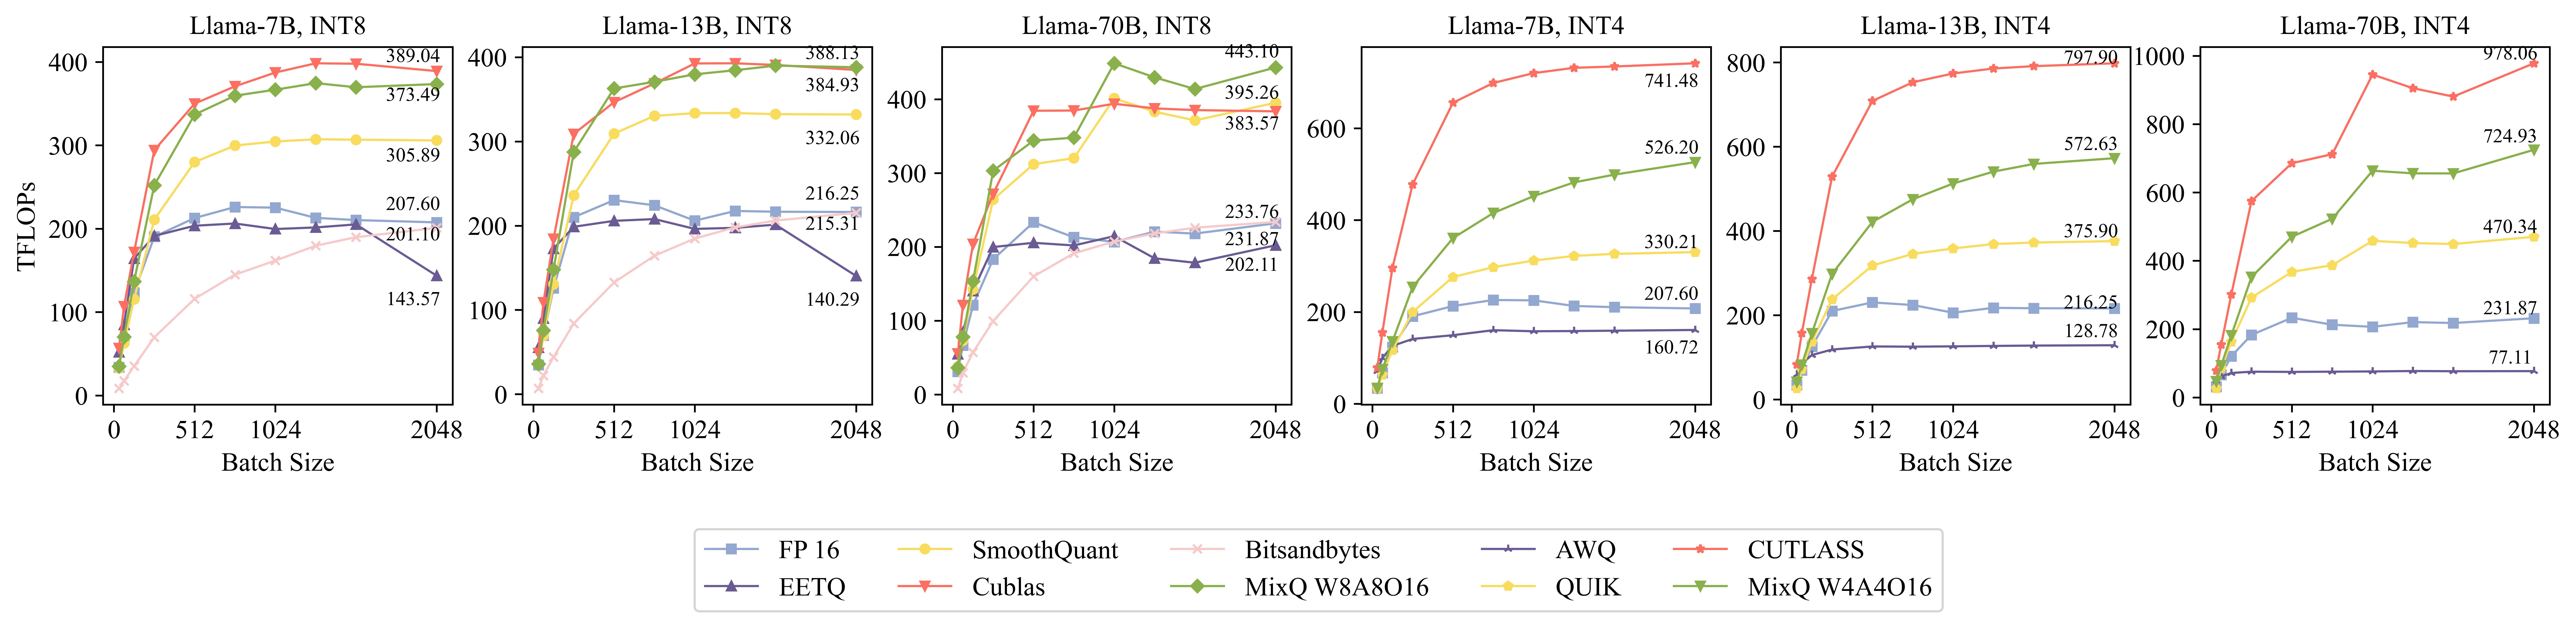

In [2]:
# llama7b
# int8
fp16_flops =  [33.79959088508295,67.42531167561981,123.38607794659407,190.44819332346125,212.82780435849497,226.02003919101054,225.25800496334165,213.05664082575,210.3696856008408,207.6002775505503]
EETQ_flops =  [52.00409885363701,84.89347934213211,164.28923501405703,191.36054073168773,203.5905173521888,206.24906930080107,199.63765727186143,201.52005028152217,205.17569015401762,143.57089490084593]
torchint8_flops =  [32.84669441873245,62.720129118354514,115.42896972669675,210.94572053006289,279.9624440644904,299.74777716536715,304.5788073471806,307.26751284933295,306.7631232603059,305.8930848886925]
cublasint8_flops =  [56.76160176129737,106.90664145693945,172.1093083652364,294.1994861211211,349.9871193968194,370.7581014765967,387.300589065464,398.36990891825883,397.83671126004356,389.0444085082821]
bnb =  [8.534490901156063,17.556245118861728,35.156637198564695,69.78875182922016,115.99024774188051,144.92268471512253,161.7782761608494,179.63527207573102,189.8376194236695,201.10135669522836]
mixq8_flops =  [35.0744066,70.26772431,136.8634123,252.1464379,336.894144,359.5249354,366.7102629,374.5541667,369.652651,373.494615]

# batch size: 2048 
# 7b int8: 1.80X 
# 512: 1.58X
# int4
fp16_flops =  [33.79959088508295,67.42531167561981,123.38607794659407,190.44819332346125,212.82780435849497,226.02003919101054,225.25800496334165,213.05664082575,210.3696856008408,207.6002775505503]
awq_flops = [71.22402954350136,99.49587836426812,126.08128584213148,141.16954513141894,149.3520694540599,160.2351725418114,157.9527622238686,158.40845785620593,159.15425091588241,160.72268549014808]
quikint4_flops = [33.51153635546554,63.015386244025734,116.71377426250659,199.7604675900021,276.1075634189722,297.4918050855583,311.7958712012581,322.02774390959485,326.46849607481704,330.2114014708563]
int4_flops = [78.74162905882547,155.07656215869193,295.7206120689927,477.620500772646,655.6161260150456,698.6625195132398,720.0521834217107,731.6497229395783,734.5183821288424,741.4797895839661]
mixq4_flops =  [34.515996,75.22913175,135.7437936,254.4094554,360.8281626,415.4663195,452.3033424,482.1029778,499.0232276,526.1998309]

# 7b int4: 2.53X
# 1.70X
import matplotlib.pyplot as plt


ai = [32, 64, 128, 256, 512, 768, 1024, 1280, 1536, 2048]

# Define the bar colors
bar_colors_default= ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#F9DC5C"]

# Set font size
plt.rcParams.update({'font.size': 12})

# Create a figure and set its size
fig, (ax1, ax3, ax5 ,ax2, ax4, ax6) = plt.subplots(1, 6, figsize=(20, 3), dpi=800)

# Plot the first graph on ax1
 
ax1.plot(ai, fp16_flops, label='FP 16', marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax1.plot(ai, EETQ_flops, label='EETQ', marker='^', color=bar_colors_default[1], linewidth=1,markersize=4)
ax1.plot(ai, torchint8_flops, label='SmoothQuant', marker='o', color=bar_colors_default[5], linewidth=1,markersize=4)
ax1.plot(ai, cublasint8_flops, label='Cublas', marker='v', color=bar_colors_default[0], linewidth=1,markersize=4)
ax1.plot(ai, bnb, label='Bitsandbytes', marker='x', color=bar_colors_default[3], linewidth=1,markersize=4)
ax1.plot(ai, mixq8_flops, label='MixQ W8A8O16', marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the first graph as needed

# Set the x-axis and y-axis labels

# Plot the second graph on ax2
ax2.plot(ai, fp16_flops, marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax2.plot(ai, awq_flops, label='AWQ', marker='2', color=bar_colors_default[1], linewidth=1,markersize=4)
ax2.plot(ai, quikint4_flops, label='QUIK', marker='p', color=bar_colors_default[5], linewidth=1,markersize=4)
ax2.plot(ai, int4_flops, label='CUTLASS', marker='*', color=bar_colors_default[0], linewidth=1,markersize=4)
ax2.plot(ai, mixq4_flops, label='MixQ W4A4O16', marker='v', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the second graph as needed

# Add a legend to ax1

# Set the x-axis and y-axis labels for ax1
ax1.set_xlabel('Batch Size',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
ax1.set_ylabel('TFLOPs',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})

# Set the title of ax1
ax1.set_title('Llama-7B, INT8',fontsize=12, fontname='Times New Roman')

# Set the x-axis and y-axis labels for ax2
ax2.set_xlabel('Batch Size',fontsize=12, fontproperties = 'Times New Roman')
# ax2.set_ylabel('TFLOPs',fontsize=12, fontproperties = 'Times New Roman')

# Set the title of ax2
ax2.set_title('Llama-7B, INT4',fontsize=12, fontname='Times New Roman')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)
ax1.set_xticks([0, 512, 1024, 2048])
ax1.set_xticklabels([0, 512, 1024, 2048])
ax2.set_xticks([0, 512, 1024, 2048])
ax2.set_xticklabels([0, 512, 1024, 2048])
x1_label = ax1.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax1.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
x1_label = ax2.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax2.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
        
ax1.text(ai[-1]-150, fp16_flops[-1] + 10, "%.2f"%(fp16_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax1.text(ai[-1]-150, EETQ_flops[-1] - 40, "%.2f"%(EETQ_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax1.text(ai[-1]-150, torchint8_flops[-1] - 30, "%.2f"%(torchint8_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax1.text(ai[-1]-150, cublasint8_flops[-1] + 6, "%.2f"%(cublasint8_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax1.text(ai[-1]-150, bnb[-1] - 20, "%.2f"%(bnb[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax1.text(ai[-1]-150, mixq8_flops[-1] -25, "%.2f"%(mixq8_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')


ax2.text(ai[-1]-150, fp16_flops[-1] + 10, "%.2f"%(fp16_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax2.text(ai[-1]-150, awq_flops[-1] - 60, "%.2f"%(awq_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax2.text(ai[-1]-150, quikint4_flops[-1] - 0, "%.2f"%(quikint4_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax2.text(ai[-1]-150, int4_flops[-1] - 60, "%.2f"%(int4_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax2.text(ai[-1]-150, mixq4_flops[-1] + 10, "%.2f"%(mixq4_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax2.text(ai[-1]-100, two_a16w16_flops[-1] - 30, "%.2f"%(two_a16w16_flops[-1]), ha='center', va='bottom', fontsize=10, color="k",fontname='Times New Roman')



# llama13b
# int8
fp16_flops_13 = [34.614084095610586,69.64505735375751,125.77880622016492,210.05127768313557,230.40561896764154,224.2357100003851,205.97335166735593,217.51078859326287,216.61063914857291,216.24582065343023]
EETQ_flops_13 = [55.28131415010235,89.96019167047203,172.78523238498494,198.71939551680344,205.78471261293285,207.8812279895072,196.2278128164527,197.47441852800665,201.28579626830188,140.2933655025706]
torchint8_flops_13 = [36.23442671419104,69.39309858071782,130.57147896801823,236.0948718292515,309.32966362698505,330.4336194357541,333.6491933771986,333.77132441481865,332.4473831348948,332.06428397894945]
cublasint8_flops_13 = [48.786104658075736,109.09029988702696,184.37041426770875,308.94991740442214,346.65579517567824,368.87054048422885,392.68832453740396,392.84280099058446,390.8707770709636,384.93390835344957]
bnb_13 = [6.854274120500968,22.14927057295131,44.07015936194556,83.93532196147888,132.67795598542259,164.35074249546355,184.75482314970122,198.0463112960303,206.14657333041686,215.3096618751481]
mixq8_flops_13 = [35.79919406,75.83993278,147.7907048,287.5525367,362.9445274,370.8561256,379.7646831,384.5848464,390.0776875,388.1297579]

# 13b int8: 1.79X
# 1.58X
# int4
fp16_flops_13 =  [34.614084095610586,69.64505735375751,125.77880622016492,210.05127768313557,230.40561896764154,224.2357100003851,205.97335166735593,217.51078859326287,216.61063914857291,216.24582065343023]
awq_flops_13 = [59.219276527923085,85.01967364372665,105.53773084417138,118.55758681667999,125.92146005807226,125.37220760198946,126.15290943065031,127.1960550100121,127.99652533929338,128.77594418667948]
quikint4_flops_13 = [26.393877867966744,71.80715810080672,136.74699765274895,237.6645551636315,318.0715909342167,345.5198546215865,358.416042944908,368.96572778041786,372.4885645146752,375.9010539847398]
int4_flops_13 = [83.23793154426251,157.34934373377962,286.0792993642261,528.7826494455269,708.5770843955337,752.8666704349002,773.7140743107078,785.5286527286825,791.1459199764541,797.901834610358]
mixq4_flops_13 =  [41.7538637,82.50419876,157.1566795,298.1841613,421.5590259,475.1344466,512.5750442,540.8160606,559.1300483,572.6332658]
# 13b int4: 2.65X
# 1.83X

ax3.plot(ai, fp16_flops_13, marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax3.plot(ai, EETQ_flops_13,  marker='^', color=bar_colors_default[1], linewidth=1,markersize=4)
ax3.plot(ai, torchint8_flops_13, marker='o', color=bar_colors_default[5], linewidth=1,markersize=4)
ax3.plot(ai, cublasint8_flops_13,  marker='v', color=bar_colors_default[0], linewidth=1,markersize=4)
ax3.plot(ai, bnb_13,  marker='x', color=bar_colors_default[3], linewidth=1,markersize=4)
ax3.plot(ai, mixq8_flops_13,  marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the first graph as needed

# Set the x-axis and y-axis labels

# Plot the second graph on ax4
ax4.plot(ai, fp16_flops_13, marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax4.plot(ai, awq_flops_13, marker='2', color=bar_colors_default[1], linewidth=1,markersize=4)
ax4.plot(ai, quikint4_flops_13,  marker='p', color=bar_colors_default[5], linewidth=1,markersize=4)
ax4.plot(ai, int4_flops_13,  marker='*', color=bar_colors_default[0], linewidth=1,markersize=4)
ax4.plot(ai, mixq4_flops_13, marker='v', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the second graph as needed

legend_font = {
    'family': 'Times New Roman', # 字体
    'style': 'normal',
    'size': 12, # 字号
    'weight': "normal", # 是否加粗，不加粗
}
# Add a legend to ax1

# Set the x-axis and y-axis labels for ax1
ax3.set_xlabel('Batch Size',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
# ax3.set_ylabel('TFLOPs',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})

# Set the title of ax1
ax3.set_title('Llama-13B, INT8',fontsize=12, fontname='Times New Roman')

# Set the x-axis and y-axis labels for ax2
ax4.set_xlabel('Batch Size',fontsize=12, fontproperties = 'Times New Roman')
# ax4.set_ylabel('TFLOPs',fontsize=12, fontproperties = 'Times New Roman')

# Set the title of ax2
ax4.set_title('Llama-13B, INT4',fontsize=12, fontname='Times New Roman')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

ax3.set_xticks([0, 512, 1024, 2048])
ax3.set_xticklabels([0, 512, 1024, 2048])
ax4.set_xticks([0, 512, 1024, 2048])
ax4.set_xticklabels([0, 512, 1024, 2048])
x1_label = ax3.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax3.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
x1_label = ax4.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax4.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
        
ax3.text(ai[-1]-150, fp16_flops_13[-1] + 10, "%.2f"%(fp16_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax3.text(ai[-1]-150, EETQ_flops_13[-1] - 40, "%.2f"%(EETQ_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax3.text(ai[-1]-150, torchint8_flops_13[-1] - 40, "%.2f"%(torchint8_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax3.text(ai[-1]-150, cublasint8_flops_13[-1] -30, "%.2f"%(cublasint8_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax3.text(ai[-1]-150, bnb_13[-1] - 25, "%.2f"%(bnb_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax3.text(ai[-1]-150, mixq8_flops_13[-1] + 5, "%.2f"%(mixq8_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')


ax4.text(ai[-1]-150, fp16_flops_13[-1] - 10, "%.2f"%(fp16_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax4.text(ai[-1]-150, awq_flops_13[-1] + 10, "%.2f"%(awq_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax4.text(ai[-1]-150, quikint4_flops_13[-1] - 0, "%.2f"%(quikint4_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax4.text(ai[-1]-150, int4_flops_13[-1] -10, "%.2f"%(int4_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax4.text(ai[-1]-150, mixq4_flops_13[-1] + 10, "%.2f"%(mixq4_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')



# llama70b
# int8
fp16_flops_70 = [30.97896444491913,66.41180624968473,120.90815928786483,183.14938116073694,233.26311430678055,212.93044927995172,206.73052839156844,220.54390829890173,217.9632928038952,231.87042197030587]
EETQ_flops_70 = [54.78453345273015,84.28389942368466,140.334044832964,199.73827214091784,205.46716594791005,201.86597748693922,214.44093944902622,184.4217583403688,178.4607691457658,202.11078239527987]
torchint8_flops_70 = [37.68060966714834,73.18880384966862,142.53734626244287,264.04180188020104,311.9833326320168,320.1432953933689,401.18644490345275,383.0484591166593,371.33618085521624,395.255580185042]
cublasint8_flops_70 = [55.49782860763295,121.05472146561314,204.02296257128762,271.9688795387088,384.3577589079408,384.69265452049274,393.8868377269866,387.5791477483364,385.281607718204,383.5668945799049]
bnb_70 = [8.183177532187878,29.26040855519975,57.1773811673724,99.42878805058972,159.88046106464537,191.241291573594,207.09288710112858,218.14202671314635,225.8705957731409,233.75712148840256]
mixq8_flops_70 = [36.15972373,77.94997015,153.3430102,303.1271474,343.9333531,347.9471736,448.6939782,429.6174515,413.8229176,443.0965984]

# 70b int8: 1.91X
# 1.47X
# int4
fp16_flops_70 =  [30.97896444491913,66.41180624968473,120.90815928786483,183.14938116073694,233.26311430678055,212.93044927995172,206.73052839156844,220.54390829890173,217.9632928038952,231.87042197030587]
awq_flops_70 = [50.123136219567044,61.596396345687246,71.68933381594215,75.46426897986902,74.85595724338427,75.5020020843029,76.21734517815756,77.40948896908525,76.80703177741067,77.11121805561984]
quikint4_flops_70 = [26.573137667893345,85.57010000877175,162.8097232068248,292.4898170251239,367.47012298660206,387.2499331099759,458.39387149570115,452.01137811428396,449.0689582457772,470.3386837842806]
int4_flops_70 = [78.56855897021117,155.06891208251795,301.7484818261625,574.877170928665,685.7359584042521,711.8642330979947,945.0887880393484,905.2324304980647,880.601322399482,978.0637098060688]
mixq4_flops_70 =  [47.18519199,94.15722892,181.6553862,352.7150406,470.4446198,522.9709596,663.6802144,655.9960328,655.7068586,724.9304643]
# 70b int4: 3.13X
# 2.02X

ax5.plot(ai, fp16_flops_70,  marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax5.plot(ai, EETQ_flops_70, marker='^', color=bar_colors_default[1], linewidth=1,markersize=4)
ax5.plot(ai, torchint8_flops_70,  marker='o', color=bar_colors_default[5], linewidth=1,markersize=4)
ax5.plot(ai, cublasint8_flops_70, marker='v', color=bar_colors_default[0], linewidth=1,markersize=4)
ax5.plot(ai, bnb_70,  marker='x', color=bar_colors_default[3], linewidth=1,markersize=4)
ax5.plot(ai, mixq8_flops_70, marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the first graph as needed

# Set the x-axis and y-axis labels

# Plot the second graph on ax4
ax6.plot(ai, fp16_flops_70, marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax6.plot(ai, awq_flops_70,  marker='2', color=bar_colors_default[1], linewidth=1,markersize=4)
ax6.plot(ai, quikint4_flops_70,  marker='p', color=bar_colors_default[5], linewidth=1,markersize=4)
ax6.plot(ai, int4_flops_70, marker='*', color=bar_colors_default[0], linewidth=1,markersize=4)
ax6.plot(ai, mixq4_flops_70, marker='v', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the second graph as needed

legend_font = {
    'family': 'Times New Roman', # 字体
    'style': 'normal',
    'size': 12, # 字号
    'weight': "normal", # 是否加粗，不加粗
}
# Add a legend to ax1

# Set the x-axis and y-axis labels for ax1
ax5.set_xlabel('Batch Size',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
# ax5.set_ylabel('TFLOPs',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})

# Set the title of ax1
ax5.set_title('Llama-70B, INT8',fontsize=12, fontname='Times New Roman')

# Set the x-axis and y-axis labels for ax2
ax6.set_xlabel('Batch Size',fontsize=12, fontproperties = 'Times New Roman')
# ax6.set_ylabel('TFLOPs',fontsize=12, fontproperties = 'Times New Roman')

# Set the title of ax2
ax6.set_title('Llama-70B, INT4',fontsize=12, fontname='Times New Roman')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

ax5.set_xticks([0, 512, 1024, 2048])
ax5.set_xticklabels([0, 512, 1024, 2048])
ax6.set_xticks([0, 512, 1024, 2048])
ax6.set_xticklabels([0, 512, 1024, 2048])
x1_label = ax5.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax5.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
x1_label = ax6.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax6.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
        
ax5.text(ai[-1]-150, fp16_flops_70[-1] - 35, "%.2f"%(fp16_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax5.text(ai[-1]-150, EETQ_flops_70[-1] - 40, "%.2f"%(EETQ_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax5.text(ai[-1]-150, torchint8_flops_70[-1] - 0, "%.2f"%(torchint8_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax5.text(ai[-1]-150, cublasint8_flops_70[-1] -30, "%.2f"%(cublasint8_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax5.text(ai[-1]-150, bnb_70[-1] + 0, "%.2f"%(bnb_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax5.text(ai[-1]-150, mixq8_flops_70[-1] + 8, "%.2f"%(mixq8_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')


ax6.text(ai[-1]-150, fp16_flops_70[-1] - 0, "%.2f"%(fp16_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax6.text(ai[-1]-150, awq_flops_70[-1] + 10, "%.2f"%(awq_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax6.text(ai[-1]-150, quikint4_flops_70[-1] - 0, "%.2f"%(quikint4_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax6.text(ai[-1]-150, int4_flops_70[-1] - 0, "%.2f"%(int4_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax6.text(ai[-1]-150, mixq4_flops_70[-1] + 10, "%.2f"%(mixq4_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
fig.legend(fontsize='small', bbox_to_anchor=(0.51, -0.11), loc='upper center', ncol=5, prop=legend_font)
plt.savefig('figure/tflops_overall.pdf', dpi=800, bbox_inches='tight')

# Show the plot
plt.show()
plt.close()

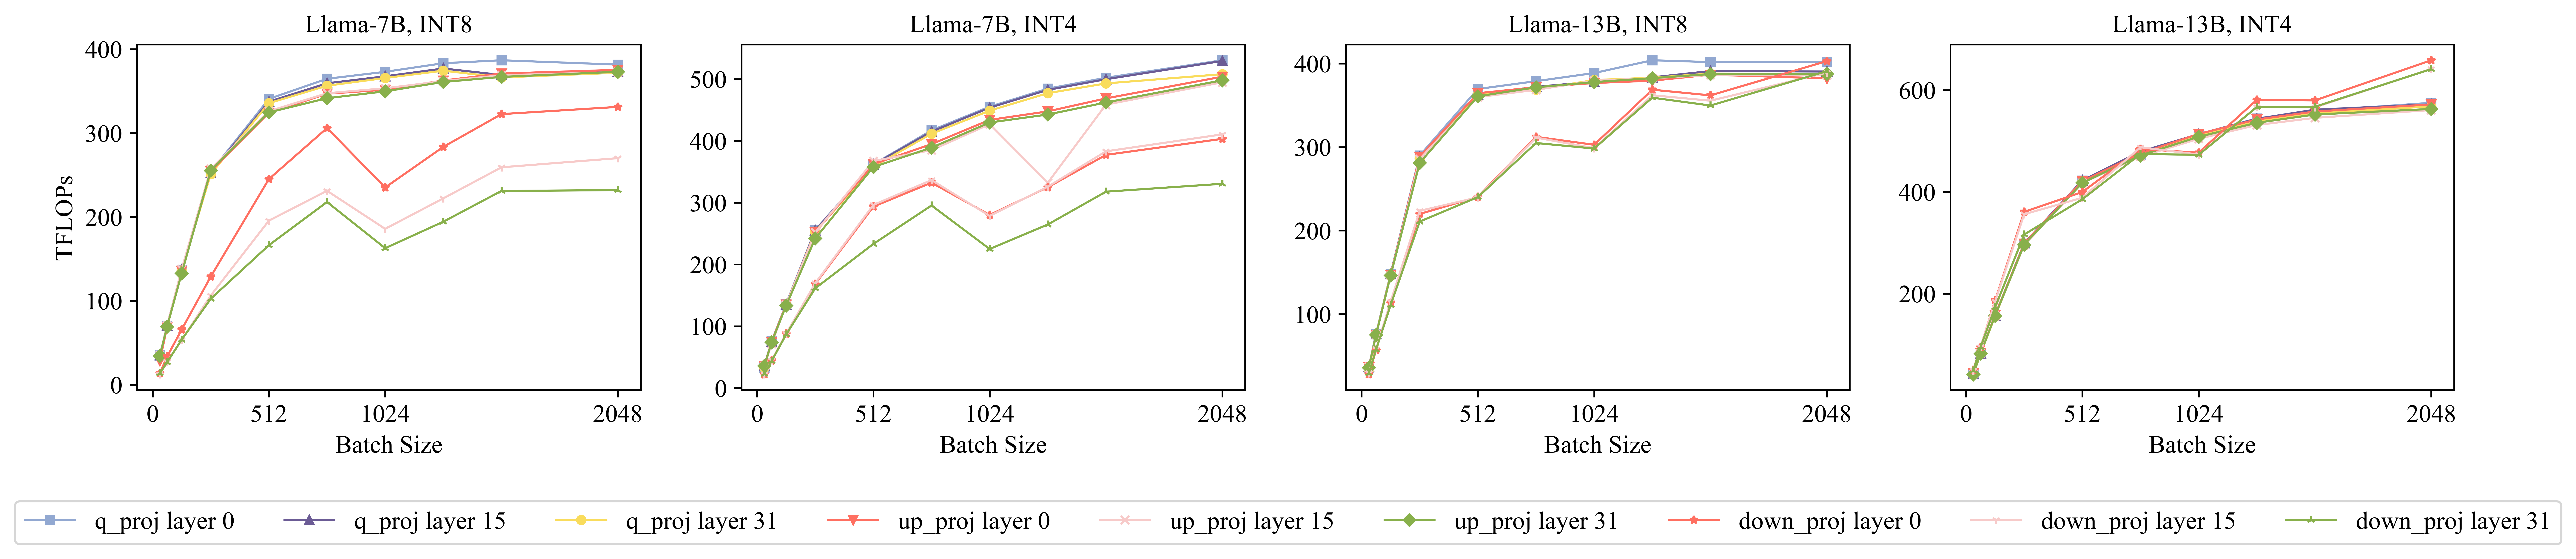

In [29]:
# llama7b
# int8
l1_flops8 =  [34.905991579179414,70.40572872866615,137.08368819990233,253.66216694695404,340.70024334918617,364.7044665659916,372.99279441556945,383.2514637203184,386.76983286125886,381.58221203773775]
l15_flops8 =  [35.163514012614804,70.3584871149485,137.09862443103134,252.49145800037965,337.43394616838833,359.3235520142894,367.6392200804626,376.95961776075893,369.21690148668023,372.9927928066294]
l31_flops8 =  [34.94864967541252,70.0919776076454,136.163962047928,251.0306599814173,335.61143336880707,356.389120727431,365.64946660807686,374.357733604454,366.3147646176676,371.911021370986]
l1_flops8_up =  [28.733357740770735,68.90970323917398,135.88457650084516,254.25160329491735,324.1765256824201,346.8596514253528,351.6990328564314,362.64084655765174,370.9402640713534,375.31522793872585]
l15_flops8_up =  [35.01867936074845,70.35848728669711,137.62344761782663,257.29295092828045,326.045523407248,347.4342904561042,353.39053965112225,361.94195231490266,368.9011844332353,372.6544956533526]
l31_flops8_up =  [34.477509354862015,69.18249317017774,132.63320125461883,255.25736631701741,324.63652498618046,341.54024774433907,349.74392318204036,360.89347786829626,366.93789572308106,373.02044127376917]
l1_flops8_down =  [13.793148529884613,33.47018043955594,65.64047128874816,128.7806679010633,245.10051950027028,305.9458401747233,235.095234270764,283.53124025620167,322.57144546051626,331.1680876100357]
l15_flops8_down =  [12.307028516964124,27.346041149103005,53.344574352027806,106.2283786245383,195.5426233469235,231.13185025356017,185.77577679631764,222.14225117653143,259.1513278816818,270.0642574265768]
l31_flops8_down =  [13.594794722827157,26.702022310319972,53.605710115491156,102.33869963920215,166.283727145029,217.7857230325169,162.70631801102857,194.29150424285424,231.0255124564845,231.88899564426856]

# int4
l1_flops4 =  [33.28108365597752,75.464268518849,136.09032868376778,255.62036286527825,362.0200615850654,416.99791831420083,455.263431469668,484.4798921452849,502.11140590489606,530.3930485932979]
l15_flops4 = [36.17858598240524,74.89828637373529,135.22742379473888,255.0762679206968,361.448110188913,414.9352739743354,453.6426196719788,482.47362428241826,499.7019653678551,529.2775419062702]
l31_flops4 = [33.20380020978102,74.69376758864918,135.09675447053726,253.02457976934508,358.3343937832523,411.5200727725542,448.8687089609363,477.1676967528892,492.93204055942647,507.8618406597493]
l1_flops4_up =  [35.51685704156682,74.68490099757821,135.02426976532738,251.9605997370782,362.22849350594413,394.7167503244425,433.8561208122395,447.6789417959969,468.69549867583953,503.82030146912115]
l15_flops4_up =  [35.77129914047563,71.29936504012224,134.7784037132913,251.73376633163517,367.30386698772116,384.97512828135984,426.9554934203779,332.2484155815131,458.57485558302045,494.7693406950927]
l31_flops4_up =  [35.795721975104726,73.95622474044518,133.46321320591764,242.07218504670738,357.7231625598071,388.98177716694624,429.6525559817762,442.6238938976137,462.09739254580836,498.0003257985509]
l1_flops4_down =  [22.130651544596503,44.324066848604595,87.85615678686516,168.27856166825416,293.60520521678865,332.3583187431153,280.0968652740685,324.87687468848037,377.30923323565077,403.2530931144999]
l15_flops4_down =  [22.330347592497173,44.84804611728217,87.70726114091444,169.64256787868823,296.3003686151662,336.5361888067495,278.50140371306,325.8135579158932,383.00824524260514,410.4850483754232]
l31_flops4_down =  [22.77653365667967,43.675325286600135,86.58179395208397,161.27646848830886,233.19163204755594,295.42432300249874,224.964910173133,264.6299047369697,317.7398063706992,330.50432259096175]

import matplotlib.pyplot as plt


ai = [32, 64, 128, 256, 512, 768, 1024, 1280, 1536, 2048]

# Define the bar colors
bar_colors_default= ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#F9DC5C"]

# Set font size
plt.rcParams.update({'font.size': 12})

# Create a figure and set its size
fig, (ax1, ax2 ,ax3, ax4) = plt.subplots(1, 4, figsize=(20, 3), dpi=800)

# Plot the first graph on ax1
 
ax1.plot(ai, l1_flops8, label='q_proj layer 0', marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax1.plot(ai, l15_flops8, label='q_proj layer 15', marker='^', color=bar_colors_default[1], linewidth=1,markersize=4)
ax1.plot(ai, l31_flops8, label='q_proj layer 31', marker='o', color=bar_colors_default[5], linewidth=1,markersize=4)
ax1.plot(ai, l1_flops8_up, label='up_proj layer 0', marker='v', color=bar_colors_default[0], linewidth=1,markersize=4)
ax1.plot(ai, l15_flops8_up, label='up_proj layer 15', marker='x', color=bar_colors_default[3], linewidth=1,markersize=4)
ax1.plot(ai, l31_flops8_up, label = 'up_proj layer 31', marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)
ax1.plot(ai, l1_flops8_down, label = 'down_proj layer 0', marker='*', color=bar_colors_default[0], linewidth=1,markersize=4)
ax1.plot(ai, l15_flops8_down, label = 'down_proj layer 15', marker='1', color=bar_colors_default[3], linewidth=1,markersize=4)
ax1.plot(ai, l31_flops8_down, label = 'down_proj layer 31', marker='2', color=bar_colors_default[2], linewidth=1,markersize=4)

# Set the x-axis and y-axis labels

# Plot the second graph on ax2
ax2.plot(ai, l1_flops4, marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax2.plot(ai, l15_flops4, marker='^', color=bar_colors_default[1], linewidth=1,markersize=4)
ax2.plot(ai, l31_flops4,  marker='o', color=bar_colors_default[5], linewidth=1,markersize=4)
ax2.plot(ai, l1_flops4_up, marker='v', color=bar_colors_default[0], linewidth=1,markersize=4)
ax2.plot(ai, l15_flops4_up, marker='x', color=bar_colors_default[3], linewidth=1,markersize=4)
ax2.plot(ai, l31_flops4_up, marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)
ax2.plot(ai, l1_flops4_down, marker='*', color=bar_colors_default[0], linewidth=1,markersize=4)
ax2.plot(ai, l15_flops4_down, marker='1', color=bar_colors_default[3], linewidth=1,markersize=4)
ax2.plot(ai, l31_flops4_down, marker='2', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the second graph as needed


# Set the x-axis and y-axis labels for ax1
ax1.set_xlabel('Batch Size',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
ax1.set_ylabel('TFLOPs',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})

# Set the title of ax1
ax1.set_title('Llama-7B, INT8',fontsize=12, fontname='Times New Roman')

# Set the x-axis and y-axis labels for ax2
ax2.set_xlabel('Batch Size',fontsize=12, fontproperties = 'Times New Roman')
# ax2.set_ylabel('TFLOPs',fontsize=12, fontproperties = 'Times New Roman')

# Set the title of ax2
ax2.set_title('Llama-7B, INT4',fontsize=12, fontname='Times New Roman')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)
xxx = [0, 512, 1024, 2048]
ax1.set_xticks(xxx)
ax1.set_xticklabels(xxx)
ax2.set_xticks(xxx)
ax2.set_xticklabels(xxx)
x1_label = ax1.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax1.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
x1_label = ax2.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax2.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
        
# ax1.text(ai[-1]-150, l1_flops8[-1] - 50, "%.2f"%(l15_flops8[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax1.text(ai[-1]-150, l15_flops8[-1] - 40, "%.2f"%(l15_flops8[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax1.text(ai[-1]-150, l31_flops8[-1] - 30, "%.2f"%(l31_flops8[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax1.text(ai[-1]-150, cublasint8_flops[-1] -30, "%.2f"%(cublasint8_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax1.text(ai[-1]-150, bnb[-1] + 10, "%.2f"%(bnb[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax1.text(ai[-1]-150, mixq8_flops[-1] + 9, "%.2f"%(mixq8_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')


# ax2.text(ai[-1]-150, l1_flops4[-1] - 60, "%.2f"%(l1_flops4[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax2.text(ai[-1]-150, l15_flops4[-1] - 60, "%.2f"%(l15_flops4[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax2.text(ai[-1]-150, l31_flops4[-1] - 0, "%.2f"%(l31_flops4[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax2.text(ai[-1]-150, int4_flops[-1] - 60, "%.2f"%(int4_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax2.text(ai[-1]-150, mixq4_flops[-1] + 10, "%.2f"%(mixq4_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax2.text(ai[-1]-100, two_a16w16_flops[-1] - 30, "%.2f"%(two_a16w16_flops[-1]), ha='center', va='bottom', fontsize=10, color="k",fontname='Times New Roman')



# llama13b
# int8
l1_flops_13 = [36.294628483958824,76.12351279647383,148.28547261880078,289.79530110961184,369.49879015109303,378.8512276155864,388.60135828921864,403.8783861632442,401.7105046511498,401.79815699857267]
l20_flops_13 = [37.03296337448785,76.18250614307736,147.86725631919145,288.5194888366174,362.72448121105464,372.0846903940594,378.1604858155874,383.4196269502212,390.96793660553857,390.41598490780314]
l39_flops_13 = [33.88916710775378,75.69124245695681,147.45139251470297,286.652813922101,362.8290714081421,368.74082507599087,380.18285269646583,382.97151389091573,387.93044963635197,386.9938629479595]
l1_flops_13_up = [36.22775030783217,75.12724561291301,146.77715589486962,288.54595347483604,364.42632200974066,371.57193525380643,376.6662305514073,379.4605565782294,386.58763549143055,382.17473475589617]
l20_flops_13_up = [36.72170371816811,75.19908284869057,146.2857145560576,285.6376989339028,359.7378994642926,368.4960531310294,379.380469354104,382.42213343009564,386.2316436403174,386.04402074333495]
l39_flops_13_up = [36.10798922944594,75.25665143988029,146.35377314238596,281.11956818522845,360.727945254761,371.4987994660489,377.7404447049792,382.51513843284783,387.3413270107189,387.67347725695356]
l1_flops_13_down = [27.941880872636325,57.159546516092966,113.49732091124291,219.90195471721393,240.37895756312827,312.25007918709565,302.69377673989584,368.64359931690063,361.8579857694101,402.81341632102345]
l20_flops_13_down = [29.49020162018932,58.28202904490611,114.92351661298223,223.61918969368742,239.78965068921886,311.35064496538814,298.63398930920164,362.0174490205772,355.45216633895205,389.044201134592]
l39_flops_13_down = [29.071853713756127,57.55645387988769,110.88667787973625,210.82863954643096,240.0751158576679,304.8339895973291,298.2167013970677,359.09510704932956,349.714222722784,390.76260267670864]

# int4
l1_4_flops_13 =  [41.98334300632951,82.97446502196269,157.9339333356346,297.86270416407467,422.04708855212914,472.3078868779987,513.2949395119014,544.2247676234302,558.8927770688761,574.9954067923047]
l20_4_flops_13 = [42.082190740174084,82.51306040417164,157.1292746415839,299.0235763212946,422.44383062129623,479.2151477629496,513.4206027962765,543.547706625765,561.4697758005361,572.0285469869739]
l39_4_flops_13 = [41.42167799890145,81.91999822000666,155.65205678259963,296.738799602684,419.3185788431778,474.4449240614194,509.7805003871938,538.2281103171117,554.0529490419542,568.1285879020617]
l1_4_flops_13_up = [43.51659976007631,83.26437040965376,157.87052512886754,298.14501181914716,421.00214023828056,475.6884881644775,513.7979630106089,542.1425657951766,557.8685913761516,571.8335764082818]
l20_4_flops_13_up = [41.733813497446214,83.13234441132042,156.23959828406,295.40125985257697,417.592987413726,469.27817657126843,504.3251310144713,531.3191224913846,545.4389108547192,560.7733139935667]
l39_4_flops_13_up = [41.3606804843085,82.19397792173218,156.59737527152694,296.2637043567213,417.73162356407386,471.5998290032133,508.25673682900225,535.6983765762797,551.9789463782727,562.9434524506353]
l1_4_flops_13_down = [49.87248858837347,95.04348045747814,186.40545683735235,360.68686648612083,399.72144959875476,484.1836070493739,476.9400395250404,580.816430150912,579.7089718891923,658.5954505686159]
l20_4_flops_13_down = [48.97154524069176,95.2683545792005,184.74284282108144,355.9718282522583,388.43890827625455,487.66032552075325,473.32230813241966,566.4795827981004,566.0576860067816,641.6312275284]
l39_4_flops_13_down = [48.98849234487298,94.90051511547445,172.96363135792816,316.13702010384765,385.3955955918757,474.4095638454379,472.79524891569343,566.4760395872476,567.1923128560423,641.2486091838211]

ax3.plot(ai, l1_flops_13, marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax3.plot(ai, l20_flops_13,  marker='^', color=bar_colors_default[1], linewidth=1,markersize=4)
ax3.plot(ai, l39_flops_13, marker='o', color=bar_colors_default[5], linewidth=1,markersize=4)
ax3.plot(ai, l1_flops_13_up,  marker='v', color=bar_colors_default[0], linewidth=1,markersize=4)
ax3.plot(ai, l20_flops_13_up,  marker='x', color=bar_colors_default[3], linewidth=1,markersize=4)
ax3.plot(ai, l39_flops_13_up,  marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)
ax3.plot(ai, l1_flops_13_down,  marker='*', color=bar_colors_default[0], linewidth=1,markersize=4)
ax3.plot(ai, l20_flops_13_down,  marker='1', color=bar_colors_default[3], linewidth=1,markersize=4)
ax3.plot(ai, l39_flops_13_down,  marker='2', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the first graph as needed

# Set the x-axis and y-axis labels

# Plot the second graph on ax4
ax4.plot(ai, l1_4_flops_13, marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax4.plot(ai, l20_4_flops_13, marker='^', color=bar_colors_default[1], linewidth=1,markersize=4)
ax4.plot(ai, l39_4_flops_13,  marker='o', color=bar_colors_default[5], linewidth=1,markersize=4)
ax4.plot(ai, l1_4_flops_13_up,  marker='v', color=bar_colors_default[0], linewidth=1,markersize=4)
ax4.plot(ai, l20_4_flops_13_up,  marker='x', color=bar_colors_default[3], linewidth=1,markersize=4)
ax4.plot(ai, l39_4_flops_13_up,  marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)
ax4.plot(ai, l1_4_flops_13_down,  marker='*', color=bar_colors_default[0], linewidth=1,markersize=4)
ax4.plot(ai, l20_4_flops_13_down,  marker='1', color=bar_colors_default[3], linewidth=1,markersize=4)
ax4.plot(ai, l39_4_flops_13_down,  marker='2', color=bar_colors_default[2], linewidth=1,markersize=4)

legend_font = {
    'family': 'Times New Roman', # 字体
    'style': 'normal',
    'size': 12, # 字号
    'weight': "normal", # 是否加粗，不加粗
}
# Add a legend to ax1

# Set the x-axis and y-axis labels for ax1
ax3.set_xlabel('Batch Size',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
# ax3.set_ylabel('TFLOPs',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})

# Set the title of ax1
ax3.set_title('Llama-13B, INT8',fontsize=12, fontname='Times New Roman')

# Set the x-axis and y-axis labels for ax2
ax4.set_xlabel('Batch Size',fontsize=12, fontproperties = 'Times New Roman')
# ax4.set_ylabel('TFLOPs',fontsize=12, fontproperties = 'Times New Roman')

# Set the title of ax2
ax4.set_title('Llama-13B, INT4',fontsize=12, fontname='Times New Roman')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

ax3.set_xticks(xxx)
ax3.set_xticklabels(xxx)
ax4.set_xticks(xxx)
ax4.set_xticklabels(xxx)

x1_label = ax3.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax3.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
x1_label = ax4.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax4.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
        
# ax3.text(ai[-1]-150, l1_flops_13[-1] - 60, "%.2f"%(l1_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax3.text(ai[-1]-150, l20_flops_13[-1] - 40, "%.2f"%(l20_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax3.text(ai[-1]-150, l39_flops_13[-1] - 40, "%.2f"%(l39_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax3.text(ai[-1]-150, cublasint8_flops_13[-1] -30, "%.2f"%(cublasint8_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax3.text(ai[-1]-150, bnb_13[-1] + 10, "%.2f"%(bnb_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax3.text(ai[-1]-150, mixq8_flops_13[-1] + 5, "%.2f"%(mixq8_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')


# ax4.text(ai[-1]-150, l1_4_flops_13[-1] - 70, "%.2f"%(l1_4_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax4.text(ai[-1]-150, l20_4_flops_13[-1] + 10, "%.2f"%(l20_4_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax4.text(ai[-1]-150, l39_4_flops_13[-1] - 0, "%.2f"%(l39_4_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax4.text(ai[-1]-150, int4_flops_13[-1] -10, "%.2f"%(int4_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax4.text(ai[-1]-150, mixq4_flops_13[-1] + 10, "%.2f"%(mixq4_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')


# llama70b
# int8
l1_flops_70 = [36.37100283739431,76.4769904578247,150.473703291963,298.7396006359661,335.4235655035933,342.7372352232407,449.8395535492259,424.1383359252014,409.9202443438785,434.766802069248,423.8650816981]
l15_flops_70 = [37.74299963111923,76.72320281672944,150.54931863712866,296.22882762044276,334.88793589519634,340.71408592968305,446.25002925278955,418.95279125423656,407.8343064206915,434.13116372039286,419.5247897428012]
l31_flops_70 = [36.507764468220046,77.2033577179855,150.98286550728412,298.86732268635313,334.6341095379178,339.8857927111715,447.91798074379557,421.8688071102769,406.8716243666684,435.4834059413725,417.85039836182]
l1_flops_70_up = [35.78269228505619,77.2488586257401,153.5812530790738,304.95157934475174,349.2343073269874,353.8103721564268,455.605475649416,444.3495288226169,426.37317186873827,456.88963884680186,446.2322236784843]
l15_flops_70_up = [36.11545105984983,77.87997688723516,153.1214971779132,301.250019402775,343.54197742229024,347.36395833463973,446.53507860962526,426.31105737337236,410.9242624128145,439.8273931315141,420.7742508691784]
l31_flops_70_up = [36.00137376452906,77.68380559293125,153.11031740504095,302.6848546877698,342.4340949067665,346.017103736145,448.4807352564224,427.1098415661853,411.67714636506525,437.52193103969614,425.60161834617645]
# l1_flops_70_down = [35.78269228505619,77.2488586257401,153.5812530790738,304.95157934475174,349.2343073269874,353.8103721564268,455.605475649416,444.3495288226169,426.37317186873827,456.88963884680186,446.2322236784843]
# l15_flops_70_down = [36.11545105984983,77.87997688723516,153.1214971779132,301.250019402775,343.54197742229024,347.36395833463973,446.53507860962526,426.31105737337236,410.9242624128145,439.8273931315141,420.7742508691784]
# l31_flops_70_down = [36.00137376452906,77.68380559293125,153.11031740504095,302.6848546877698,342.4340949067665,346.017103736145,448.4807352564224,427.1098415661853,411.67714636506525,437.52193103969614,425.60161834617645]


# int4
l1_4_flops_70 =  [48.68040850585517,94.10176691457684,182.58331484183424,350.63567803817114,470.08170982742774,520.8590121313943,662.9476420899596,655.913431037877,655.3941395097218,728.8420865044224,747.87272990965]
l15_4_flops_70 = [46.94976237005889,94.00896435271343,181.46162113644007,351.7236067613909,470.8997473827215,523.5463125246998,662.5810939071927,656.3856107895581,654.5418270682533,721.9111913796056,746.7160388037912]
l31_4_flops_70 = [47.47695329438714,93.99211069925084,181.3517772770682,352.4329057180239,470.3716543057881,524.4191066220266,662.5810942879763,655.3190522460148,656.6082418311609,721.4610463765872,744.2564982740317]
l1_4_flops_70_up =  [47.22889794123719,91.79514882074943,178.2837674736238,345.0966002213522,467.6706269432675,516.8581673350328,675.7377180178357,663.4667317597319,666.0620953971707,723.7173595148514,748.6987500015242]
l15_4_flops_70_up = [47.23315264351134,92.11771783823038,177.6946252768954,334.66080920377834,467.85321104566754,505.1755243240797,660.9366421985902,651.6334698481518,629.1613262780979,693.2447438235806,705.0065092135596]
l31_4_flops_70_up = [47.15244132373298,92.36927258642909,176.88528899387688,343.34512516362804,461.3434550720335,488.33437954610093,656.4112873947142,651.1074497873511,626.982506527231,691.5160253326625,699.1599199959155]
# l1_4_flops_70_down =  [48.68040850585517,94.10176691457684,182.58331484183424,350.63567803817114,470.08170982742774,520.8590121313943,662.9476420899596,655.913431037877,655.3941395097218,728.8420865044224,747.87272990965]
# l15_4_flops_70_down = [46.94976237005889,94.00896435271343,181.46162113644007,351.7236067613909,470.8997473827215,523.5463125246998,662.5810939071927,656.3856107895581,654.5418270682533,721.9111913796056,746.7160388037912]
# l31_4_flops_70_down = [47.47695329438714,93.99211069925084,181.3517772770682,352.4329057180239,470.3716543057881,524.4191066220266,662.5810942879763,655.3190522460148,656.6082418311609,721.4610463765872,744.2564982740317]


# ax5.plot(ai, l1_flops_70,  marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
# ax5.plot(ai, l15_flops_70, marker='^', color=bar_colors_default[1], linewidth=1,markersize=4)
# ax5.plot(ai, l31_flops_70,  marker='o', color=bar_colors_default[5], linewidth=1,markersize=4)
# ax5.plot(ai, l1_flops_70_up, marker='v', color=bar_colors_default[0], linewidth=1,markersize=4)
# ax5.plot(ai, l15_flops_70_up,  marker='x', color=bar_colors_default[3], linewidth=1,markersize=4)
# ax5.plot(ai, l31_flops_70_up, marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the first graph as needed

# Set the x-axis and y-axis labels

# Plot the second graph on ax4
# ax6.plot(ai, l1_4_flops_70, marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
# ax6.plot(ai, l15_4_flops_70,  marker='^', color=bar_colors_default[1], linewidth=1,markersize=4)
# ax6.plot(ai, l31_4_flops_70,  marker='o', color=bar_colors_default[5], linewidth=1,markersize=4)
# ax6.plot(ai, l1_4_flops_70_up, marker='v', color=bar_colors_default[0], linewidth=1,markersize=4)
# ax6.plot(ai, l15_4_flops_70_up,  marker='x', color=bar_colors_default[3], linewidth=1,markersize=4)
# ax6.plot(ai, l31_4_flops_70_up, marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)

legend_font = {
    'family': 'Times New Roman', # 字体
    'style': 'normal',
    'size': 12, # 字号
    'weight': "normal", # 是否加粗，不加粗
}
# Add a legend to ax1

# Set the x-axis and y-axis labels for ax1
ax5.set_xlabel('Batch Size',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
# ax5.set_ylabel('TFLOPs',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})

# Set the title of ax1
ax5.set_title('Llama-70B, INT8',fontsize=12, fontname='Times New Roman')

# Set the x-axis and y-axis labels for ax2
ax6.set_xlabel('Batch Size',fontsize=12, fontproperties = 'Times New Roman')
# ax6.set_ylabel('TFLOPs',fontsize=12, fontproperties = 'Times New Roman')

# Set the title of ax2
ax6.set_title('Llama-70B, INT4',fontsize=12, fontname='Times New Roman')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

ax5.set_xticks([0, 1024, 2048, 4096])
ax5.set_xticklabels([0, 1024, 2048, 4096])
ax6.set_xticks([0, 1024, 2048, 4096])
ax6.set_xticklabels([0, 1024, 2048, 4096])

x1_label = ax5.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax5.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
x1_label = ax6.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax6.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
        
# ax5.text(ai[-1]-150, l1_flops_70[-1] + 5, "%.2f"%(l1_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax5.text(ai[-1]-150, l15_flops_70[-1] + 10, "%.2f"%(l15_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax5.text(ai[-1]-150, l31_flops_70[-1] - 0, "%.2f"%(l31_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax5.text(ai[-1]-150, cublasint8_flops_70[-1] -30, "%.2f"%(cublasint8_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax5.text(ai[-1]-150, bnb_70[-1] + 10, "%.2f"%(bnb_70[-1]), ha='center', va='bottom', fontsize=10, color="k",fontname='Times New Roman')
# ax5.text(ai[-1]-150, mixq8_flops_70[-1] + 10, "%.2f"%(mixq8_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')


# ax6.text(ai[-1]-150, l1_4_flops_70[-1] - 70, "%.2f"%(l1_4_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax6.text(ai[-1]-150, l15_4_flops_70[-1] + 10, "%.2f"%(l15_4_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax6.text(ai[-1]-150, l31_4_flops_70[-1] - 0, "%.2f"%(l31_4_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax6.text(ai[-1]-150, int4_flops_70[-1] - 0, "%.2f"%(int4_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax6.text(ai[-1]-150, mixq4_flops_70[-1] + 10, "%.2f"%(mixq4_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')

fig.legend(fontsize='small', bbox_to_anchor=(0.51, -0.11), loc='upper center', ncol=9, prop=legend_font)
plt.savefig('figure/mlpupdown.pdf', dpi=800, bbox_inches='tight')

# Show the plot
plt.show()
plt.close()

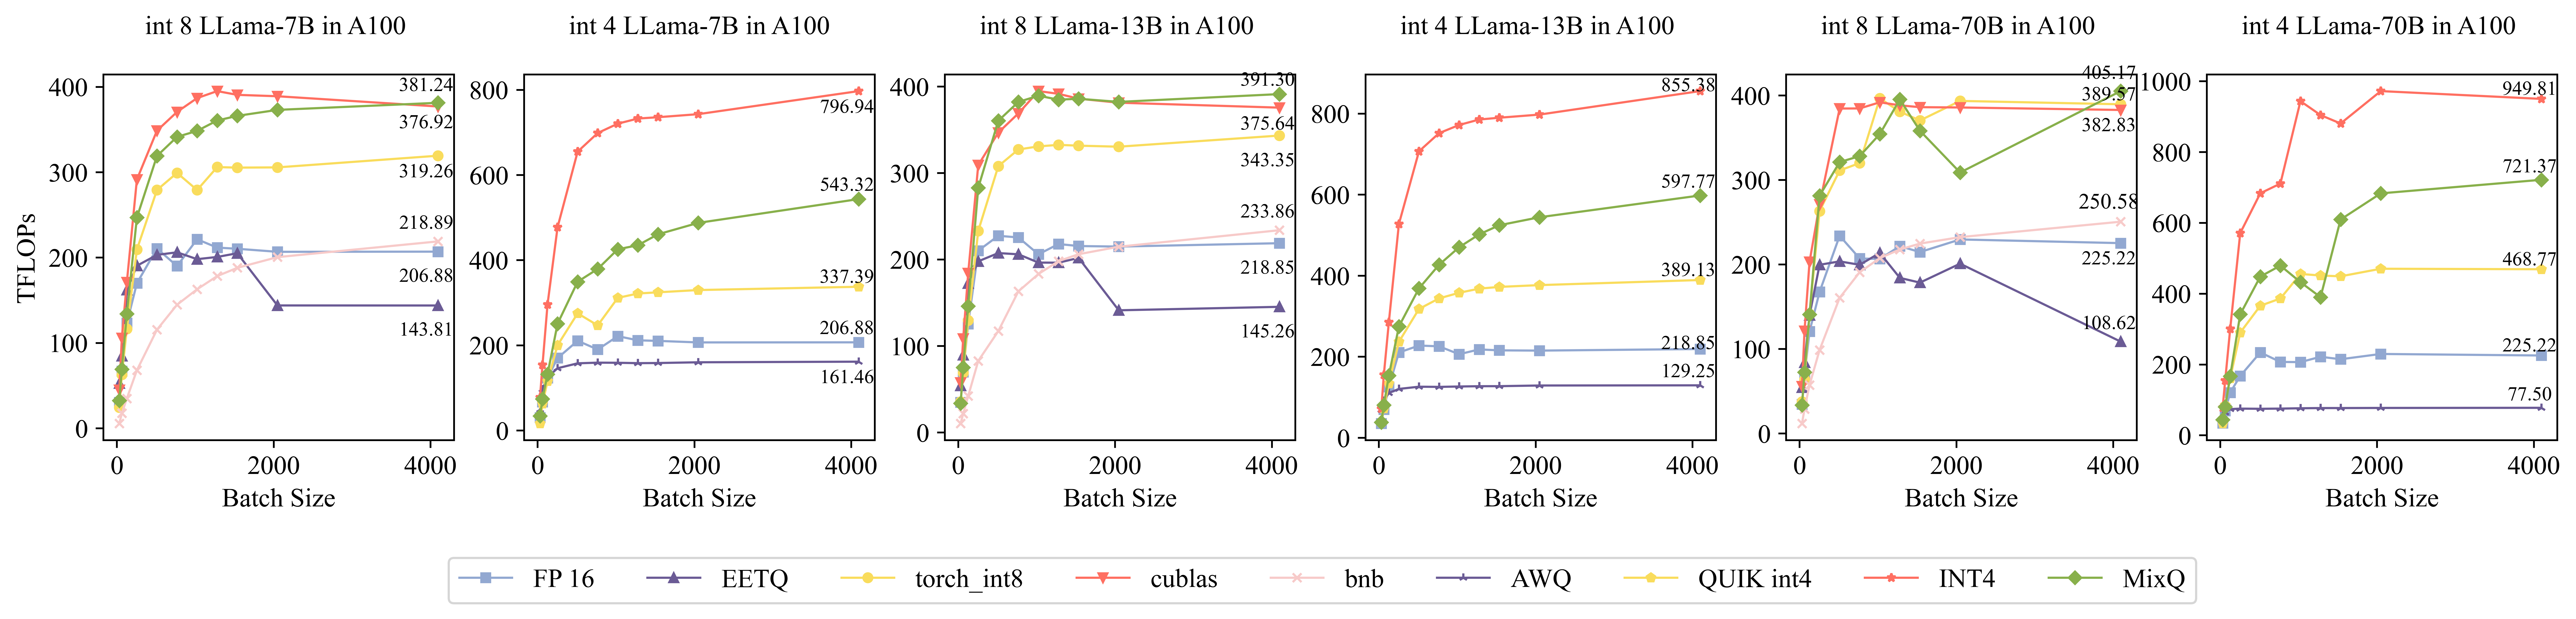

In [7]:
# llama7b
# int8
fp16_flops =  [30.32611626841587,66.95174894006463,123.2410599776488,169.91306310113615,210.53100846552366,190.03592426897654,221.36450783504065,211.62689649176218,210.25836857057902,206.69869263262711,206.88454491835697]
EETQ_flops =  [52.67461426836966,84.58531581456678,162.04652229760117,190.3329634444801,203.09760053157748,206.11955896192958,198.078109035831,200.6716001426212,205.02246517651307,143.86739447230164,143.8124118954098]
torchint8_flops =  [24.268847085460603,62.952333002898406,116.4653089338915,209.3488384774473,279.1240469293861,299.10650551636945,279.07761528188325,305.915393810411,305.30550461902897,305.582005393751,319.25942737015953]
cublasint8_flops =  [45.0354751288162,105.82768504560758,171.17278739106163,291.3722815852524,348.60539928828706,370.53974053784486,386.750025319152,394.94388322639816,390.5411991620026,388.91664850845825,376.9172759497876]
bnb =  [5.527257386469212,17.637947849390752,34.892441078760704,67.95513185501933,115.4845881271206,144.6782888362991,162.82762765832004,178.25346391307235,187.9121689819154,200.46059974561868,218.88678425007217]
mixq8_flops =  [32.43314442,69.06988418,134.0311863,246.8771532,318.9653184,341.3163689,348.3529008,360.4906751,365.9384579,372.9321491,381.2440925]

# int4
fp16_flops =  [30.32611626841587,66.95174894006463,123.2410599776488,169.91306310113615,210.53100846552366,190.03592426897654,221.36450783504065,211.62689649176218,210.25836857057902,206.69869263262711,206.88454491835697]
awq_flops = [48.94805003156429,96.89100592980107,125.2031074138984,146.02992597502143,157.61476340494738,159.1542531942879,158.8667966978949,157.9907745453526,158.2977488304049,160.0243122344176,161.45522745497013]
quikint4_flops = [16.130284089141057,62.86427020063886,115.65176476584999,200.06219493654214,274.9461807338041,246.6915174520477,311.29448157806013,321.55044508331173,324.3784903244545,329.6760804362283,337.385881290426]
int4_flops = [77.65312429178607,153.82533272788146,295.7901279865357,477.25818659410356,654.6780692890513,698.4686081186626,720.4644725176396,732.458919914055,735.5918735746183,742.7381153878845,796.938515004134]
mixq4_flops =  [33.9552662,74.0582446,131.8835094,250.603909,349.2092498,379.2536012,425.4527801,434.8784285,460.5510543,487.3741036,543.3153312]

import matplotlib.pyplot as plt


ai = [32, 64, 128, 256, 512, 768, 1024, 1280, 1536, 2048, 4096]

# Define the bar colors
bar_colors_default= ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#F9DC5C"]

# Set font size
plt.rcParams.update({'font.size': 12})

# Create a figure and set its size
fig, (ax1, ax2, ax3 ,ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20, 3), dpi=800)

# Plot the first graph on ax1
 
ax1.plot(ai, fp16_flops, label='FP 16', marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax1.plot(ai, EETQ_flops, label='EETQ', marker='^', color=bar_colors_default[1], linewidth=1,markersize=4)
ax1.plot(ai, torchint8_flops, label='torch_int8', marker='o', color=bar_colors_default[5], linewidth=1,markersize=4)
ax1.plot(ai, cublasint8_flops, label='cublas', marker='v', color=bar_colors_default[0], linewidth=1,markersize=4)
ax1.plot(ai, bnb, label='bnb', marker='x', color=bar_colors_default[3], linewidth=1,markersize=4)
ax1.plot(ai, mixq8_flops, marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the first graph as needed

# Set the x-axis and y-axis labels

# Plot the second graph on ax2
ax2.plot(ai, fp16_flops, marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax2.plot(ai, awq_flops, label='AWQ', marker='2', color=bar_colors_default[1], linewidth=1,markersize=4)
ax2.plot(ai, quikint4_flops, label='QUIK int4', marker='p', color=bar_colors_default[5], linewidth=1,markersize=4)
ax2.plot(ai, int4_flops, label='INT4', marker='*', color=bar_colors_default[0], linewidth=1,markersize=4)
ax2.plot(ai, mixq4_flops, label='MixQ', marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the second graph as needed

# Add a legend to ax1

# Set the x-axis and y-axis labels for ax1
ax1.set_xlabel('Batch Size',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
ax1.set_ylabel('TFLOPs',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})

# Set the title of ax1
ax1.set_title('int 8 LLama-7B in A100 \n',fontsize=12, fontname='Times New Roman')

# Set the x-axis and y-axis labels for ax2
ax2.set_xlabel('Batch Size',fontsize=12, fontproperties = 'Times New Roman')
# ax2.set_ylabel('TFLOPs',fontsize=12, fontproperties = 'Times New Roman')

# Set the title of ax2
ax2.set_title('int 4 LLama-7B in A100\n',fontsize=12, fontname='Times New Roman')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

x1_label = ax1.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax1.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
x1_label = ax2.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax2.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
        
ax1.text(ai[-1]-150, fp16_flops[-1] - 40, "%.2f"%(fp16_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax1.text(ai[-1]-150, EETQ_flops[-1] - 40, "%.2f"%(EETQ_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax1.text(ai[-1]-150, torchint8_flops[-1] - 30, "%.2f"%(torchint8_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax1.text(ai[-1]-150, cublasint8_flops[-1] -30, "%.2f"%(cublasint8_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax1.text(ai[-1]-150, bnb[-1] + 10, "%.2f"%(bnb[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax1.text(ai[-1]-150, mixq8_flops[-1] + 9, "%.2f"%(mixq8_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')


ax2.text(ai[-1]-150, fp16_flops[-1] + 10, "%.2f"%(fp16_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax2.text(ai[-1]-150, awq_flops[-1] - 60, "%.2f"%(awq_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax2.text(ai[-1]-150, quikint4_flops[-1] - 0, "%.2f"%(quikint4_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax2.text(ai[-1]-150, int4_flops[-1] - 60, "%.2f"%(int4_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax2.text(ai[-1]-150, mixq4_flops[-1] + 10, "%.2f"%(mixq4_flops[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
# ax2.text(ai[-1]-100, two_a16w16_flops[-1] - 30, "%.2f"%(two_a16w16_flops[-1]), ha='center', va='bottom', fontsize=10, color="k",fontname='Times New Roman')



# llama13b
# int8
fp16_flops_13 = [34.92769534576959,69.8553906463922,125.46777068242649,210.19163024917762,227.43216342934238,225.50021579094323,206.01719340718375,217.88743086584782,215.57155964479563,214.9437032814708,218.85228762271208]
EETQ_flops_13 = [54.0726055645399,89.56064173466152,172.48206705978626,197.89431234548928,207.43343377825326,206.01606695274927,196.42691733807172,196.32088091371804,201.8238853289775,141.24930613570254,145.26231372105832]
torchint8_flops_13 = [35.61416520248764,68.96106547392493,129.4858017412811,233.0859549188213,307.96690961833207,327.2368712985575,330.8158588032972,332.59266971476524,331.65292338629143,330.46832450935835,343.3451205283085]
cublasint8_flops_13 = [57.740968123139154,108.42850880816677,184.1761128281419,309.16246287813874,346.7704358300288,368.98591989525994,394.7704073088891,391.6006477697916,385.99468366340017,381.35236734897126,375.63734834932427]
bnb_13 = [10.264592232005853,21.766128878734943,42.0518139332838,82.70179012811289,117.19424772830888,163.15452362908482,183.2560764360725,198.0837239867442,206.11280667256864,214.79877129548103,233.85813091044363]
mixq8_flops_13 = [33.76584169,75.06464535,146.0527081,282.9147987,360.454909,382.2306548,389.3909362,384.8840487,385.8993513,382.2857382,391.2984371]

# int4
fp16_flops_13 =  [34.92769534576959,69.8553906463922,125.46777068242649,210.19163024917762,227.43216342934238,225.50021579094323,206.01719340718375,217.88743086584782,215.57155964479563,214.9437032814708,218.85228762271208]
awq_flops_13 = [68.70401721389743,91.37474873730734,110.37641881576548,120.38760093604057,125.85429239806881,125.41108364784192,126.35136932123093,127.08985193554571,127.1943386531329,128.8242863483137,129.25214499503045]
quikint4_flops_13 = [37.74028257804694,72.41546959899186,133.88355210937428,236.6454577401248,317.73426071414525,343.78288366059394,357.6621535504089,367.8611712852669,372.15072441938327,376.58731503144594,389.1301307490002]
int4_flops_13 = [71.78094239005301,155.35994001634288,285.30092282361244,527.452716624037,706.7463415144953,751.5476464360129,771.768393988988,785.2149274312077,789.6564356855569,797.3961895520205,855.3839802093428]
mixq4_flops_13 =  [37.98111477,80.63373789,153.2131949,274.5808946,368.4666152,426.7475849,470.0601602,501.8297165,524.3195662,544.0522251,597.7697305]

ax3.plot(ai, fp16_flops_13, marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax3.plot(ai, EETQ_flops_13,  marker='^', color=bar_colors_default[1], linewidth=1,markersize=4)
ax3.plot(ai, torchint8_flops_13, marker='o', color=bar_colors_default[5], linewidth=1,markersize=4)
ax3.plot(ai, cublasint8_flops_13,  marker='v', color=bar_colors_default[0], linewidth=1,markersize=4)
ax3.plot(ai, bnb_13,  marker='x', color=bar_colors_default[3], linewidth=1,markersize=4)
ax3.plot(ai, mixq8_flops_13,  marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the first graph as needed

# Set the x-axis and y-axis labels

# Plot the second graph on ax4
ax4.plot(ai, fp16_flops_13, marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax4.plot(ai, awq_flops_13, marker='2', color=bar_colors_default[1], linewidth=1,markersize=4)
ax4.plot(ai, quikint4_flops_13,  marker='p', color=bar_colors_default[5], linewidth=1,markersize=4)
ax4.plot(ai, int4_flops_13,  marker='*', color=bar_colors_default[0], linewidth=1,markersize=4)
ax4.plot(ai, mixq4_flops_13, marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the second graph as needed

legend_font = {
    'family': 'Times New Roman', # 字体
    'style': 'normal',
    'size': 12, # 字号
    'weight': "normal", # 是否加粗，不加粗
}
# Add a legend to ax1

# Set the x-axis and y-axis labels for ax1
ax3.set_xlabel('Batch Size',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
# ax3.set_ylabel('TFLOPs',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})

# Set the title of ax1
ax3.set_title('int 8 LLama-13B in A100 \n',fontsize=12, fontname='Times New Roman')

# Set the x-axis and y-axis labels for ax2
ax4.set_xlabel('Batch Size',fontsize=12, fontproperties = 'Times New Roman')
# ax4.set_ylabel('TFLOPs',fontsize=12, fontproperties = 'Times New Roman')

# Set the title of ax2
ax4.set_title('int 4 LLama-13B in A100 \n',fontsize=12, fontname='Times New Roman')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

x1_label = ax3.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax3.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
x1_label = ax4.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax4.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
        
ax3.text(ai[-1]-150, fp16_flops_13[-1] - 40, "%.2f"%(fp16_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax3.text(ai[-1]-150, EETQ_flops_13[-1] - 40, "%.2f"%(EETQ_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax3.text(ai[-1]-150, torchint8_flops_13[-1] - 40, "%.2f"%(torchint8_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax3.text(ai[-1]-150, cublasint8_flops_13[-1] -30, "%.2f"%(cublasint8_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax3.text(ai[-1]-150, bnb_13[-1] + 10, "%.2f"%(bnb_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax3.text(ai[-1]-150, mixq8_flops_13[-1] + 5, "%.2f"%(mixq8_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')


ax4.text(ai[-1]-150, fp16_flops_13[-1] - 10, "%.2f"%(fp16_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax4.text(ai[-1]-150, awq_flops_13[-1] + 10, "%.2f"%(awq_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax4.text(ai[-1]-150, quikint4_flops_13[-1] - 0, "%.2f"%(quikint4_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax4.text(ai[-1]-150, int4_flops_13[-1] -10, "%.2f"%(int4_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax4.text(ai[-1]-150, mixq4_flops_13[-1] + 10, "%.2f"%(mixq4_flops_13[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')



# llama70b
# int8
fp16_flops_70 = [34.55856596834093,68.97618657394534,120.62996968175675,167.47739738018566,233.8809481214635,207.00345379508946,206.52185608586606,221.62534860854595,214.63389209280282,229.56229600728923,225.21944896552367]
EETQ_flops_70 = [54.302226120483525,83.81232519715712,139.76354350911583,199.5767012645476,203.61193175645334,199.57037291373976,213.60276965996218,184.0737293074459,178.47722510832963,200.8994790746746,108.62414225958968]
torchint8_flops_70 = [37.607632171051826,63.72385268940355,141.23186595067077,263.16376154301304,311.2309536382474,319.9886090343664,396.5494922414315,380.8641010716539,370.37977457586777,393.5357488978078,389.5676102811094]
cublasint8_flops_70 = [55.75752279208401,121.3068022849856,203.01568524741657,271.1425476474545,384.53394838011934,384.63385876518254,391.9177739929904,388.31114611562606,386.1387995782712,385.7762452938274,382.8338726238798]
bnb_70 = [11.666918864339769,28.845863831831814,57.27419684846351,98.64308570179628,160.49223475553566,190.80629592703806,207.4898710544183,217.73209577459667,224.66878102359277,232.3022363578169,250.57918565238168]
mixq8_flops_70 = [33.61138223,72.51790847,140.803505,281.3368567,321.1177564,328.2718449,354.3076675,395.2893433,358.2539362,308.7909212,405.1652288]

# int4
fp16_flops_70 =  [34.55856596834093,68.97618657394534,120.62996968175675,167.47739738018566,233.8809481214635,207.00345379508946,206.52185608586606,221.62534860854595,214.63389209280282,229.56229600728923,225.21944896552367]
awq_flops_70 = [53.71803275565141,64.27723688812351,73.8347154039776,75.19369078261178,74.73147448714705,75.25364842764293,76.22773385546989,76.77563492344676,76.81953565115603,77.12244203454846,77.49589702695688]
quikint4_flops_70 = [33.03642118655917,85.13932984309771,160.8615502735342,289.9021263332292,365.7238511062475,386.1447259215776,455.5559887895847,451.0392312020341,448.7806591867852,470.18050723996737,468.77153194082473]
int4_flops_70 = [78.20524958460506,154.56603514214524,300.58075765270695,570.886597864391,683.2783142994625,710.6580919863601,943.4412724636403,904.100693047724,880.3240828571719,971.8316635725533,949.8105576487981]
mixq4_flops_70 =  [43.73724448,80.10911792,166.8495596,341.6429139,448.1170703,479.0544778,432.2828933,389.952412,609.219576,683.0426985,721.3696865]

ax5.plot(ai, fp16_flops_70,  marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax5.plot(ai, EETQ_flops_70, marker='^', color=bar_colors_default[1], linewidth=1,markersize=4)
ax5.plot(ai, torchint8_flops_70,  marker='o', color=bar_colors_default[5], linewidth=1,markersize=4)
ax5.plot(ai, cublasint8_flops_70, marker='v', color=bar_colors_default[0], linewidth=1,markersize=4)
ax5.plot(ai, bnb_70,  marker='x', color=bar_colors_default[3], linewidth=1,markersize=4)
ax5.plot(ai, mixq8_flops_70, marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the first graph as needed

# Set the x-axis and y-axis labels

# Plot the second graph on ax4
ax6.plot(ai, fp16_flops_70, marker='s', color=bar_colors_default[4], linewidth=1,markersize=4)
ax6.plot(ai, awq_flops_70,  marker='2', color=bar_colors_default[1], linewidth=1,markersize=4)
ax6.plot(ai, quikint4_flops_70,  marker='p', color=bar_colors_default[5], linewidth=1,markersize=4)
ax6.plot(ai, int4_flops_70, marker='*', color=bar_colors_default[0], linewidth=1,markersize=4)
ax6.plot(ai, mixq4_flops_70, marker='D', color=bar_colors_default[2], linewidth=1,markersize=4)
# Customize the second graph as needed

legend_font = {
    'family': 'Times New Roman', # 字体
    'style': 'normal',
    'size': 12, # 字号
    'weight': "normal", # 是否加粗，不加粗
}
# Add a legend to ax1

# Set the x-axis and y-axis labels for ax1
ax5.set_xlabel('Batch Size',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
# ax5.set_ylabel('TFLOPs',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})

# Set the title of ax1
ax5.set_title('int 8 LLama-70B in A100 \n',fontsize=12, fontname='Times New Roman')

# Set the x-axis and y-axis labels for ax2
ax6.set_xlabel('Batch Size',fontsize=12, fontproperties = 'Times New Roman')
# ax6.set_ylabel('TFLOPs',fontsize=12, fontproperties = 'Times New Roman')

# Set the title of ax2
ax6.set_title('int 4 LLama-70B in A100 \n',fontsize=12, fontname='Times New Roman')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

x1_label = ax5.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax5.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
x1_label = ax6.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax6.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
        
ax5.text(ai[-1]-150, fp16_flops_70[-1] - 30, "%.2f"%(fp16_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax5.text(ai[-1]-150, EETQ_flops_70[-1] + 10, "%.2f"%(EETQ_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax5.text(ai[-1]-150, torchint8_flops_70[-1] - 0, "%.2f"%(torchint8_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax5.text(ai[-1]-150, cublasint8_flops_70[-1] -30, "%.2f"%(cublasint8_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax5.text(ai[-1]-150, bnb_70[-1] + 10, "%.2f"%(bnb_70[-1]), ha='center', va='bottom', fontsize=10, color="k",fontname='Times New Roman')
ax5.text(ai[-1]-150, mixq8_flops_70[-1] + 10, "%.2f"%(mixq8_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')


ax6.text(ai[-1]-150, fp16_flops_70[-1] - 0, "%.2f"%(fp16_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax6.text(ai[-1]-150, awq_flops_70[-1] + 10, "%.2f"%(awq_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax6.text(ai[-1]-150, quikint4_flops_70[-1] - 0, "%.2f"%(quikint4_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax6.text(ai[-1]-150, int4_flops_70[-1] - 0, "%.2f"%(int4_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')
ax6.text(ai[-1]-150, mixq4_flops_70[-1] + 10, "%.2f"%(mixq4_flops_70[-1]), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman')

fig.legend(fontsize='small', bbox_to_anchor=(0.51, -0.11), loc='upper center', ncol=9, prop=legend_font)
plt.savefig('figure/tflops_fuse2.pdf', dpi=800, bbox_inches='tight')

# Show the plot
plt.show()
plt.close()

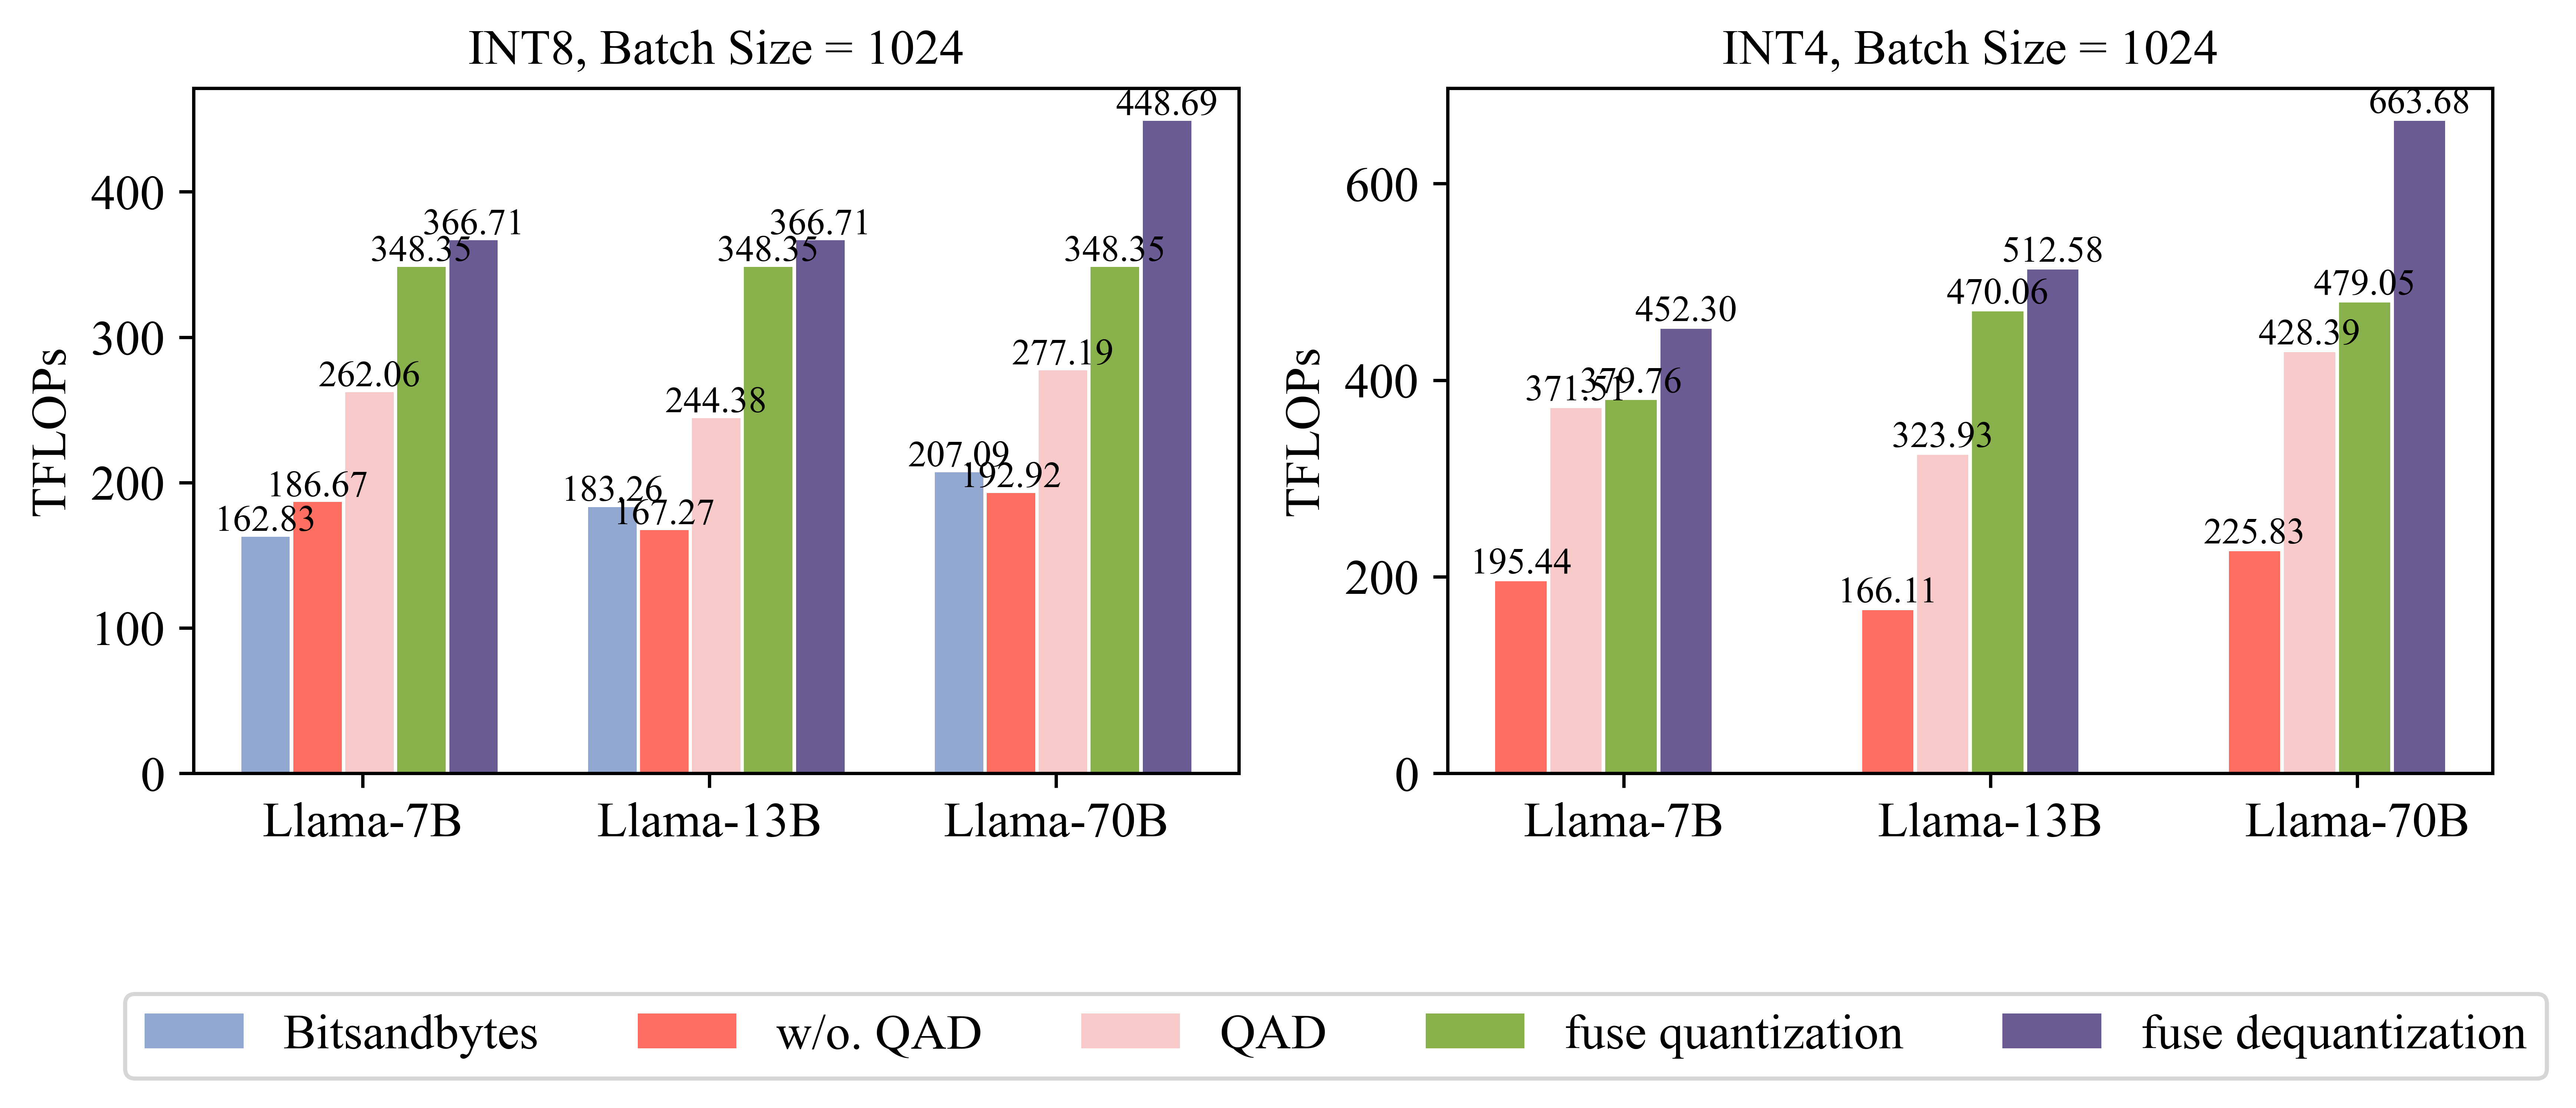

In [31]:
# batch size == 1024
import matplotlib.pyplot as plt
import numpy as np

# Define the bar colors
bar_colors_default= ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#F9DC5C"]

# Set font size
plt.rcParams.update({'font.size': 12})

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate("%.2f"%(height), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman',
                    xy=(rect.get_x() + rect.get_width() / 2, height - 4),
                    xytext=(0, 1),  # 1 points vertical offset
                    textcoords="offset points")

# Create a figure and set its size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), dpi=800)

# Plot the first graph on ax1
labels = ['unscheduled', 'unfused', 'fuse1', 'fuse2']
llama8 = [186.6653794, 262.0566106, 348.3529008, 366.7102629]
llama4 = [195.440493, 371.5115662, 379.7646831, 452.3033424]
# Plot the second graph on ax2
labels = ['unscheduled', 'unfused', 'fuse1', 'fuse2']
llama13_8 = [167.2737553, 244.3806752, 389.3909362, 366.7102629]
llama13_4 = [166.1059161, 323.9310135, 470.0601602, 512.5750442]
# ax 3 maybe
# labels = ['unscheduled', 'unfused', 'fuse1', 'fuse2']
llama70_8 = [192.921466, 277.1870944, 354.3076675, 448.6939782]
llama70_4 = [225.8313132, 428.3879121, 479.0544778, 663.6802144]

labels = ['Llama-7B', 'Llama-13B', 'Llama-70B']
bnb = [162.82762765832004, 183.2560764360725, 207.09288710112858]
unschedule = [186.6653794, 167.2737553, 192.921466]
unfuse = [262.0566106, 244.3806752, 277.1870944]
fuse1 = [348.3529008, 348.3529008, 348.3529008]
fuse2 = [366.7102629, 366.7102629, 448.6939782]

width = 0.14  # the width of the bars
x = np.arange(len(labels))
rects0 = ax1.bar(x - width*2, bnb, width, label='Bitsandbytes', color=bar_colors_default[4])
rects1 = ax1.bar(x - width+0.01, unschedule, width, label='w/o. QAD', color=bar_colors_default[0])
rects2 = ax1.bar(x + 0.02, unfuse, width, label='QAD', color=bar_colors_default[3])
rects3 = ax1.bar(x + width + 0.03, fuse1, width, label='fuse quantization', color=bar_colors_default[2])
rects4 = ax1.bar(x + width*2 + 0.04, fuse2, width, label='fuse dequantization', color = bar_colors_default[1])
autolabel(rects0, ax1)
autolabel(rects1, ax1)
autolabel(rects2, ax1)
autolabel(rects3, ax1)
autolabel(rects4, ax1)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)


# ax2
unschedule4 = [195.440493, 166.1059161, 225.8313132]
unfuse4 = [371.5115662, 323.9310135, 428.3879121]
fuse14 = [379.7646831, 470.0601602, 479.0544778]
fuse24 = [452.3033424, 512.5750442, 663.6802144]

rects1 = ax2.bar(x - width*2, unschedule4, width, color=bar_colors_default[0])
rects2 = ax2.bar(x - width+0.01, unfuse4, width, color=bar_colors_default[3])
rects3 = ax2.bar(x + 0.02, fuse14, width, color=bar_colors_default[2])
rects4 = ax2.bar(x + width+0.03, fuse24, width, color = bar_colors_default[1])
autolabel(rects1, ax2)
autolabel(rects2, ax2)
autolabel(rects3, ax2)
autolabel(rects4, ax2)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)


# Set the x-axis and y-axis labels for ax1
# ax1.set_xlabel('Batch Size',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
ax1.set_ylabel('TFLOPs',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
ax1.set_title('INT8, Batch Size = 1024',fontsize=12, fontname='Times New Roman')

# Set the x-axis and y-axis labels for ax2
# ax2.set_xlabel('Batch Size',fontsize=12, fontproperties = 'Times New Roman')
ax2.set_ylabel('TFLOPs',fontsize=12, fontproperties = 'Times New Roman')

# Set the title of ax2
ax2.set_title('INT4, Batch Size = 1024',fontsize=12, fontname='Times New Roman')


x1_label = ax1.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax1.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
x1_label = ax2.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax2.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]

legend_font = {
    'family': 'Times New Roman', # 字体
    'style': 'normal',
    'size': 12, # 字号
    'weight': "normal", # 是否加粗，不加粗
}
# Add a legend to ax1


fig.legend(fontsize='small', bbox_to_anchor=(0.51, -0.11), loc='upper center', ncol=9, prop=legend_font)
plt.savefig('figure/break_down.pdf', dpi=800, bbox_inches='tight')

# Show the plot
plt.show()
plt.close()

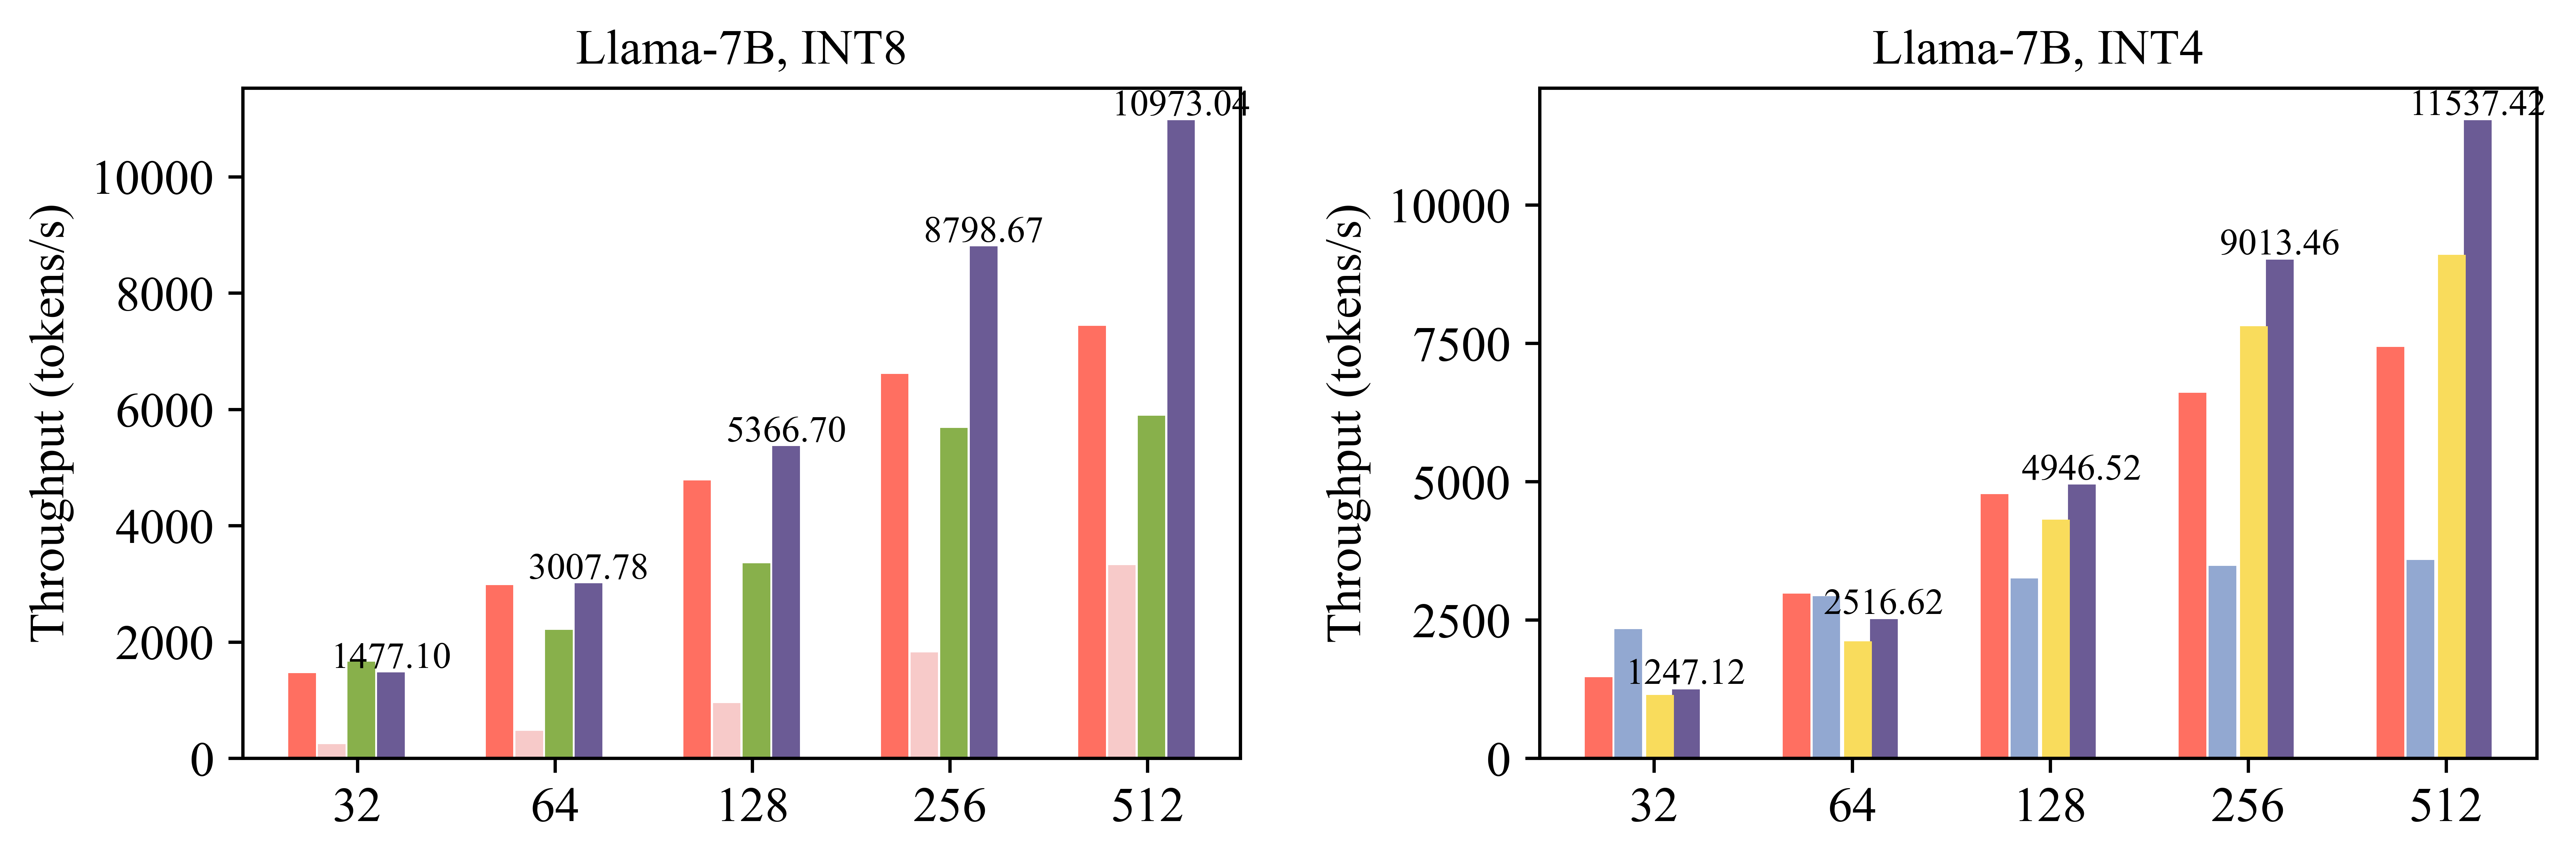

In [7]:
# llama7b throughput
import matplotlib.pyplot as plt
import numpy as np

# Define the bar colors
bar_colors_default= ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#F9DC5C"]

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate("%.2f"%(height), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman',
                    xy=(rect.get_x() + rect.get_width() / 2, height - 120),
                    xytext=(0, 1),  # 1 points vertical offset
                    textcoords="offset points")

# Set font size
plt.rcParams.update({'font.size': 12})

# Create a figure and set its size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), dpi=800)

labels = ['32', '64', '128', '256', '512']
bnb = [243.25558399002458, 473.0694539536351, 946.8923387338575, 1818.3019073052687, 3322.93297372658]
fp16 = [1464.9072056929558, 2979.338904982297, 4777.1966329127445, 6608.57736171889, 7433.2856168722155]
mixq8 = [1477.0951511016222, 3007.7812811635126, 5366.696608771711, 8798.674342091785, 10973.036772088673]
EETQ = [1658.8894, 2210.129776, 3350.20729297, 5681.27497242, 5888.09020148]

width = 0.14  # the width of the bars
x = np.arange(len(labels))
rects1 = ax1.bar(x - width*2, fp16, width, label='FP 16', color=bar_colors_default[0])
rects2 = ax1.bar(x - width+0.01, bnb, width, label='Bitsandbytes', color=bar_colors_default[3])
rects3 = ax1.bar(x + 0.02, EETQ, width, label='EETQ', color=bar_colors_default[2])
rects4 = ax1.bar(x + width+0.03, mixq8, width, label='MixQ', color = bar_colors_default[1])
autolabel(rects4, ax1)

ax1.set_xticks(x)
ax1.set_xticklabels(labels)


# ax2
awq = [2331.8894670546842, 2930.182195272376, 3250.207572927797, 3481.27497175242, 3588.091702130148]
fp16 = [1464.9072056929558, 2979.338904982297, 4777.1966329127445, 6608.57736171889, 7433.2856168722155]
mixq4 = [1247.1158726102813, 2516.6217222144096, 4946.523351914129, 9013.459003664173, 11537.423162057035]
quik = [1147.1158726102813, 2116.6217222144096, 4311.523351914129, 7813.459003664173, 9100.423162057035]

rects1 = ax2.bar(x - width*2, fp16, width, color=bar_colors_default[0])
rects2 = ax2.bar(x - width+0.01, awq, width, label='AWQ', color=bar_colors_default[4])
#rects4 = ax2.bar(x + 0.02, quik, width, color=bar_colors_default[1])
rects3 = ax2.bar(x + width + 0.02, mixq4, width, color=bar_colors_default[1])
rects4 = ax2.bar(x +0.03, quik, width, color = bar_colors_default[5])
autolabel(rects3, ax2)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)


# Set the x-axis and y-axis labels for ax1
# ax1.set_xlabel('Batch Size',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
ax1.set_ylabel('Throughput (tokens/s)',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
ax1.set_title('Llama-7B, INT8',fontsize=12, fontname='Times New Roman')

# Set the x-axis and y-axis labels for ax2
# ax2.set_xlabel('Batch Size',fontsize=12, fontproperties = 'Times New Roman')
ax2.set_ylabel('Throughput (tokens/s)',fontsize=12, fontproperties = 'Times New Roman')

# Set the title of ax2
ax2.set_title('Llama-7B, INT4',fontsize=12, fontname='Times New Roman')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

x1_label = ax1.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax1.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
x1_label = ax2.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax2.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]

legend_font = {
    'family': 'Times New Roman', # 字体
    'style': 'normal',
    'size': 12, # 字号
    'weight': "normal", # 是否加粗，不加粗
}
# Add a legend to ax1

#fig.legend(fontsize='small', bbox_to_anchor=(0.51, -0.11), loc='upper center', ncol=9, prop=legend_font)
plt.savefig('figure/throughput-llama7b.pdf', dpi=800, bbox_inches='tight')

# Show the plot
plt.show()
plt.close()

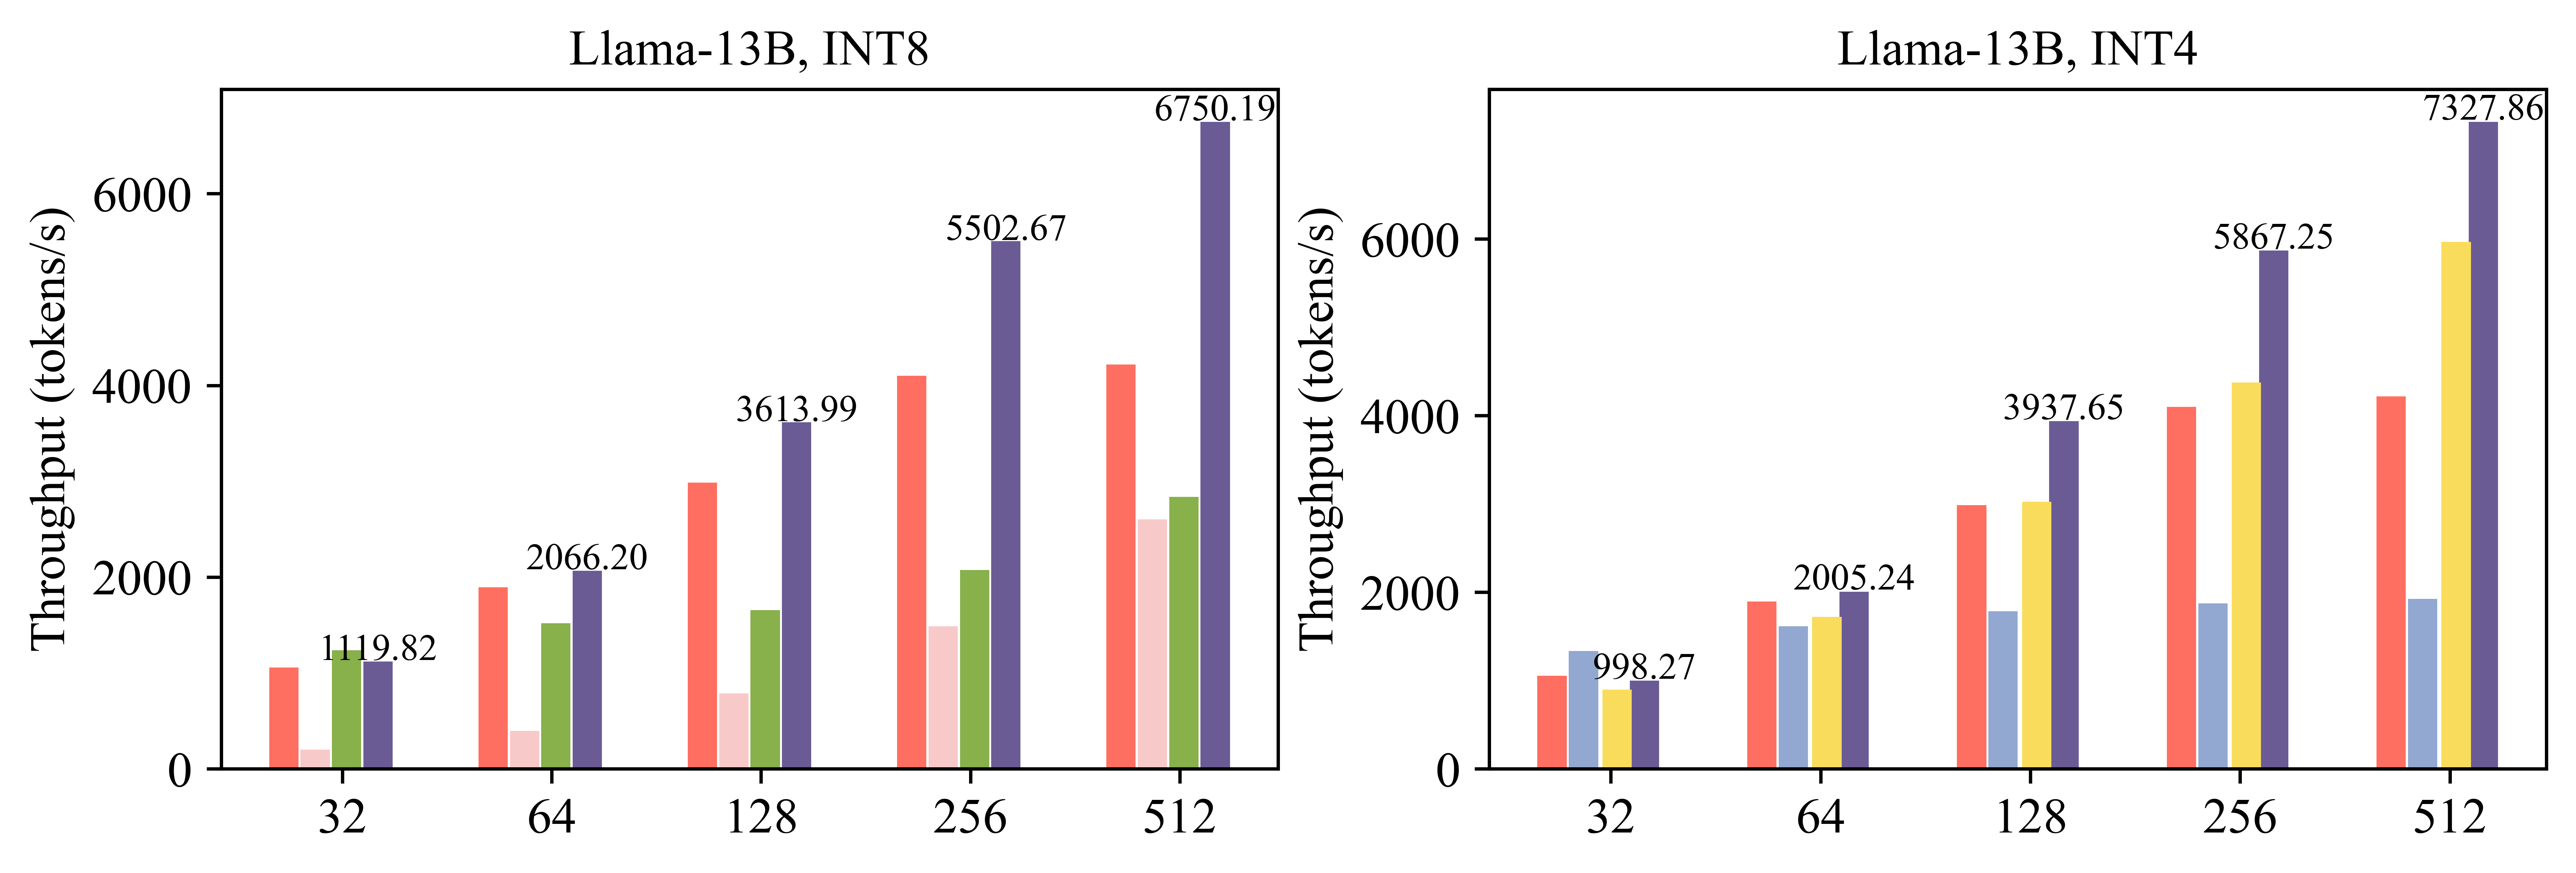

In [10]:
# llama13b throughput
import matplotlib.pyplot as plt
import numpy as np

# Define the bar colors
bar_colors_default= ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#F9DC5C"]

# Set font size
plt.rcParams.update({'font.size': 12})

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate("%.2f"%(height), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman',
                    xy=(rect.get_x() + rect.get_width() / 2, height - 110),
                    xytext=(0, 1),  # 1 points vertical offset
                    textcoords="offset points")
        
# Create a figure and set its size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), dpi=800)

labels = ['32', '64', '128', '256', '512']
bnb = [199.17495475749348, 396.18516405788205, 788.9794250234215, 1488.9144521134426, 2600.688776625473]
fp16 = [1055.8514765808147, 1893.811398759026, 2984.4234119550174, 4100.700700991241, 4218.614590526068]
mixq8 = [1119.82485649446, 2066.199364981623, 3613.9903267173104, 5502.671661601693, 6750.185134077457]
EETQ = [1237.56659, 1517.5228886642, 1653.547278382, 2073.561759205, 2835.11675554]

width = 0.14  # the width of the bars
x = np.arange(len(labels))
rects1 = ax1.bar(x - width*2, fp16, width, label='FP 16', color=bar_colors_default[0])
rects2 = ax1.bar(x - width+0.01, bnb, width, label='Bitsandbytes', color=bar_colors_default[3])
rects3 = ax1.bar(x + 0.02, EETQ, width, label='EETQ', color=bar_colors_default[2])
rects4 = ax1.bar(x + width+0.03, mixq8, width, label='MixQ', color = bar_colors_default[1])
# autolabel(rects1)
autolabel(rects4, ax1)
# autolabel(rects1, ax1)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)


# ax2
awq = [1332.5694542349659, 1616.5357228886642, 1783.547262078382, 1873.5696401759205, 1925.1180722675554]
fp16 = [1055.8514765808147, 1893.811398759026, 2984.4234119550174, 4100.700700991241, 4218.614590526068]
mixq4 = [998.2687159958498, 2005.2399471116855, 3937.6492522535077, 5867.249292372928, 7327.857666157665]

quik = [898.652002037925,	1721.46485507108,	3024.71075889485,	4373.71819503186,	5966.65530825936 ] 
rects1 = ax2.bar(x - width*2, fp16, width, color=bar_colors_default[0])
rects2 = ax2.bar(x - width+0.01, awq, width, label='AWQ', color=bar_colors_default[4])
#rects4 = ax2.bar(x + 0.02, quik, width, color=bar_colors_default[1])
rects3 = ax2.bar(x + width + 0.02, mixq4, width, color=bar_colors_default[1])
rects4 = ax2.bar(x +0.03, quik, width, color = bar_colors_default[5])
# rects4 = ax2.bar(x + width+0.03, fuse24, width, color = bar_colors_default[1])
autolabel(rects3, ax2)
# autolabel(rects1, ax2)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)


# Set the x-axis and y-axis labels for ax1
# ax1.set_xlabel('Batch Size',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
ax1.set_ylabel('Throughput (tokens/s)',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
ax1.set_title('Llama-13B, INT8',fontsize=12, fontname='Times New Roman')

# Set the x-axis and y-axis labels for ax2
# ax2.set_xlabel('Batch Size',fontsize=12, fontproperties = 'Times New Roman')
ax2.set_ylabel('Throughput (tokens/s)',fontsize=12, fontproperties = 'Times New Roman')

# Set the title of ax2
ax2.set_title('Llama-13B, INT4',fontsize=12, fontname='Times New Roman')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

x1_label = ax1.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax1.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
x1_label = ax2.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax2.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]

legend_font = {
    'family': 'Times New Roman', # 字体
    'style': 'normal',
    'size': 12, # 字号
    'weight': "normal", # 是否加粗，不加粗
}
# Add a legend to ax1

#fig.legend(fontsize='small', bbox_to_anchor=(0.51, -0.11), loc='upper center', ncol=9, prop=legend_font)
plt.savefig('figure/throughput-llama13b.pdf', dpi=800, bbox_inches='tight')

# Show the plot
plt.show()
plt.close()

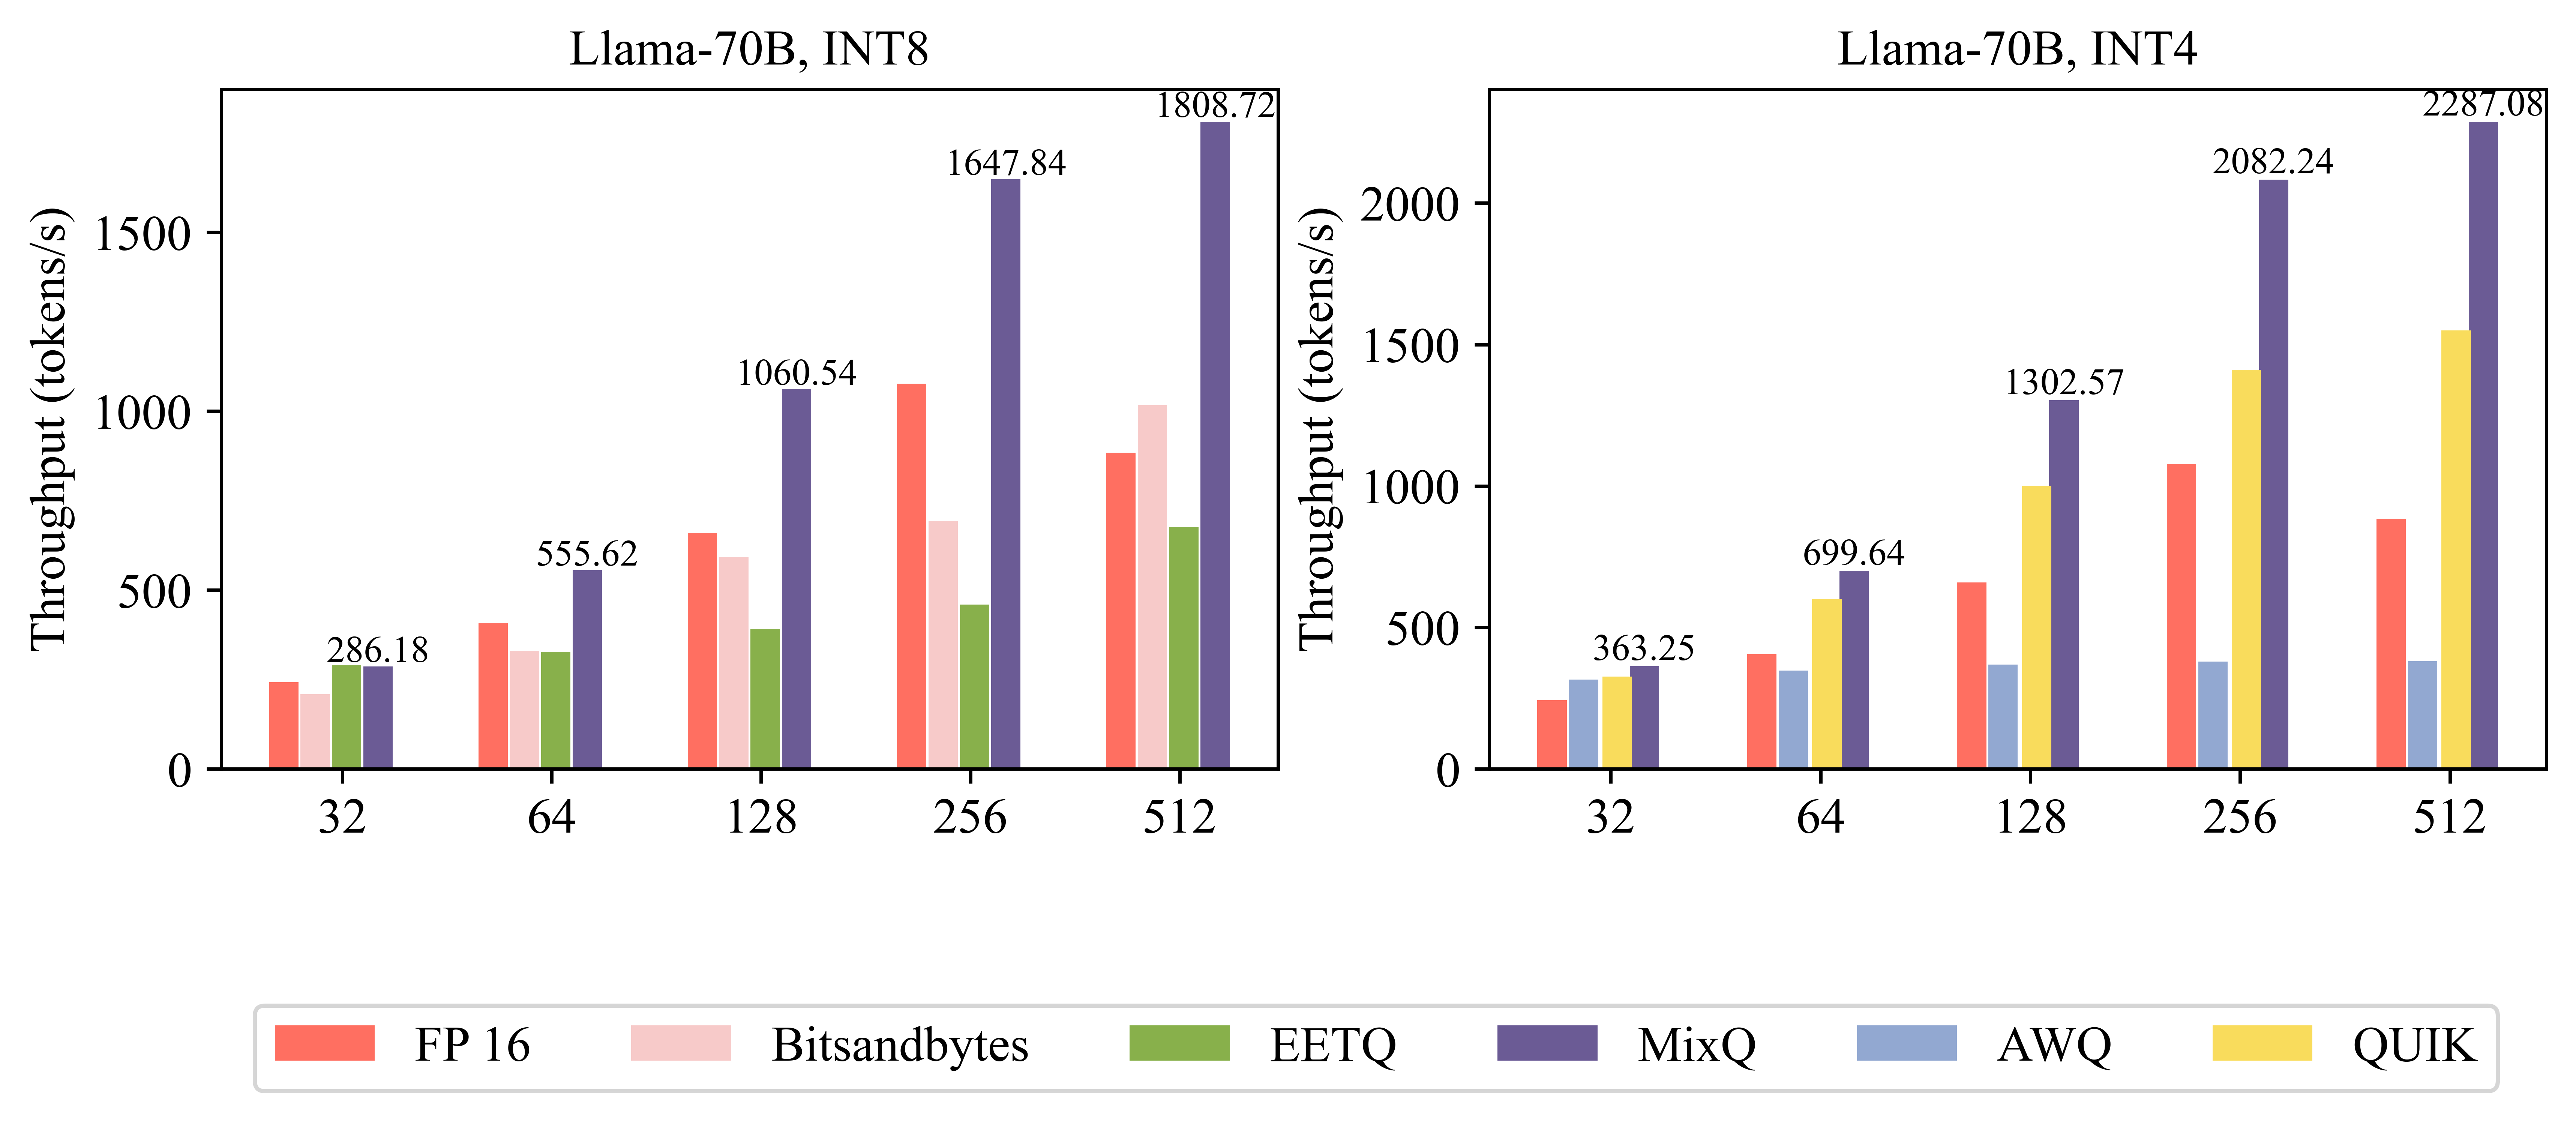

In [12]:
# llama70b throughput
import matplotlib.pyplot as plt
import numpy as np

# Define the bar colors
bar_colors_default= ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#F9DC5C"]
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate("%.2f"%(height), ha='center', va='bottom', fontsize=9, color="k",fontname='Times New Roman',
                    xy=(rect.get_x() + rect.get_width() / 2, height - 20),
                    xytext=(0, 1),  # 1 points vertical offset
                    textcoords="offset points")
# Set font size
plt.rcParams.update({'font.size': 12})

# Create a figure and set its size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), dpi=800)

labels = ['32', '64', '128', '256', '512']
bnb = [209.1440, 330.36, 591.943, 693.58832, 1016.8992]
fp16 = [242.6908144076378, 406.63136025521686, 659.4347788704126, 1076.3401090231819, 884.3713803299482]
mixq8 = [286.18157549654046, 555.6174445801337, 1060.540219349537, 1647.8403328394252, 1808.7180012397919]
EETQ = [289.318855, 327.78492, 389.93272, 459.132875, 674.9744]

width = 0.14  # the width of the bars
x = np.arange(len(labels))
rects1 = ax1.bar(x - width*2, fp16, width, label='FP 16', color=bar_colors_default[0])
rects2 = ax1.bar(x - width+0.01, bnb, width, label='Bitsandbytes', color=bar_colors_default[3])
rects3 = ax1.bar(x + 0.02, EETQ, width, label='EETQ', color=bar_colors_default[2])
rects4 = ax1.bar(x + width+0.03, mixq8, width, label='MixQ', color = bar_colors_default[1])
autolabel(rects4, ax1)
# autolabel(rects1, ax1)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)


# ax2
awq = [316.31885536922755, 347.7843736659392, 368.6990016293272, 379.13280377331375, 380.99175490307744]
fp16 = [242.6908144076378, 406.63136025521686, 659.4347788704126, 1076.3401090231819, 884.3713803299482]
mixq4 = [363.2483646510218, 699.6437240421243, 1302.5741414469812, 2082.2428160863815, 2287.0838133405896]
quik = [327, 600.6324, 1000.5741414469812, 1410.2428160863815, 1550.133405896]

rects1 = ax2.bar(x - width*2, fp16, width, color=bar_colors_default[0])
rects2 = ax2.bar(x - width+0.01, awq, width, label='AWQ', color=bar_colors_default[4])
#rects4 = ax2.bar(x + 0.02, quik, width, color=bar_colors_default[1])
rects3 = ax2.bar(x + width + 0.02, mixq4, width, color=bar_colors_default[1])
rects4 = ax2.bar(x +0.03, quik, width, label='QUIK',color = bar_colors_default[5])
# rects4 = ax2.bar(x + width+0.03, fuse24, width, color = bar_colors_default[1])
autolabel(rects3, ax2)
# autolabel(rects1, ax2)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)


# Set the x-axis and y-axis labels for ax1
# ax1.set_xlabel('Batch Size',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
ax1.set_ylabel('Throughput (tokens/s)',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
ax1.set_title('Llama-70B, INT8',fontsize=12, fontname='Times New Roman')

# Set the x-axis and y-axis labels for ax2
# ax2.set_xlabel('Batch Size',fontsize=12, fontproperties = 'Times New Roman')
ax2.set_ylabel('Throughput (tokens/s)',fontsize=12, fontproperties = 'Times New Roman')

# Set the title of ax2
ax2.set_title('Llama-70B, INT4',fontsize=12, fontname='Times New Roman')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

x1_label = ax1.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax1.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
x1_label = ax2.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax2.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]

legend_font = {
    'family': 'Times New Roman', # 字体
    'style': 'normal',
    'size': 12, # 字号
    'weight': "normal", # 是否加粗，不加粗
}
# Add a legend to ax1

fig.legend(fontsize='small', bbox_to_anchor=(0.51, -0.11), loc='upper center', ncol=9, prop=legend_font)
plt.savefig('figure/throughput-llama70b.pdf', dpi=800, bbox_inches='tight')

# Show the plot
plt.show()
plt.close()

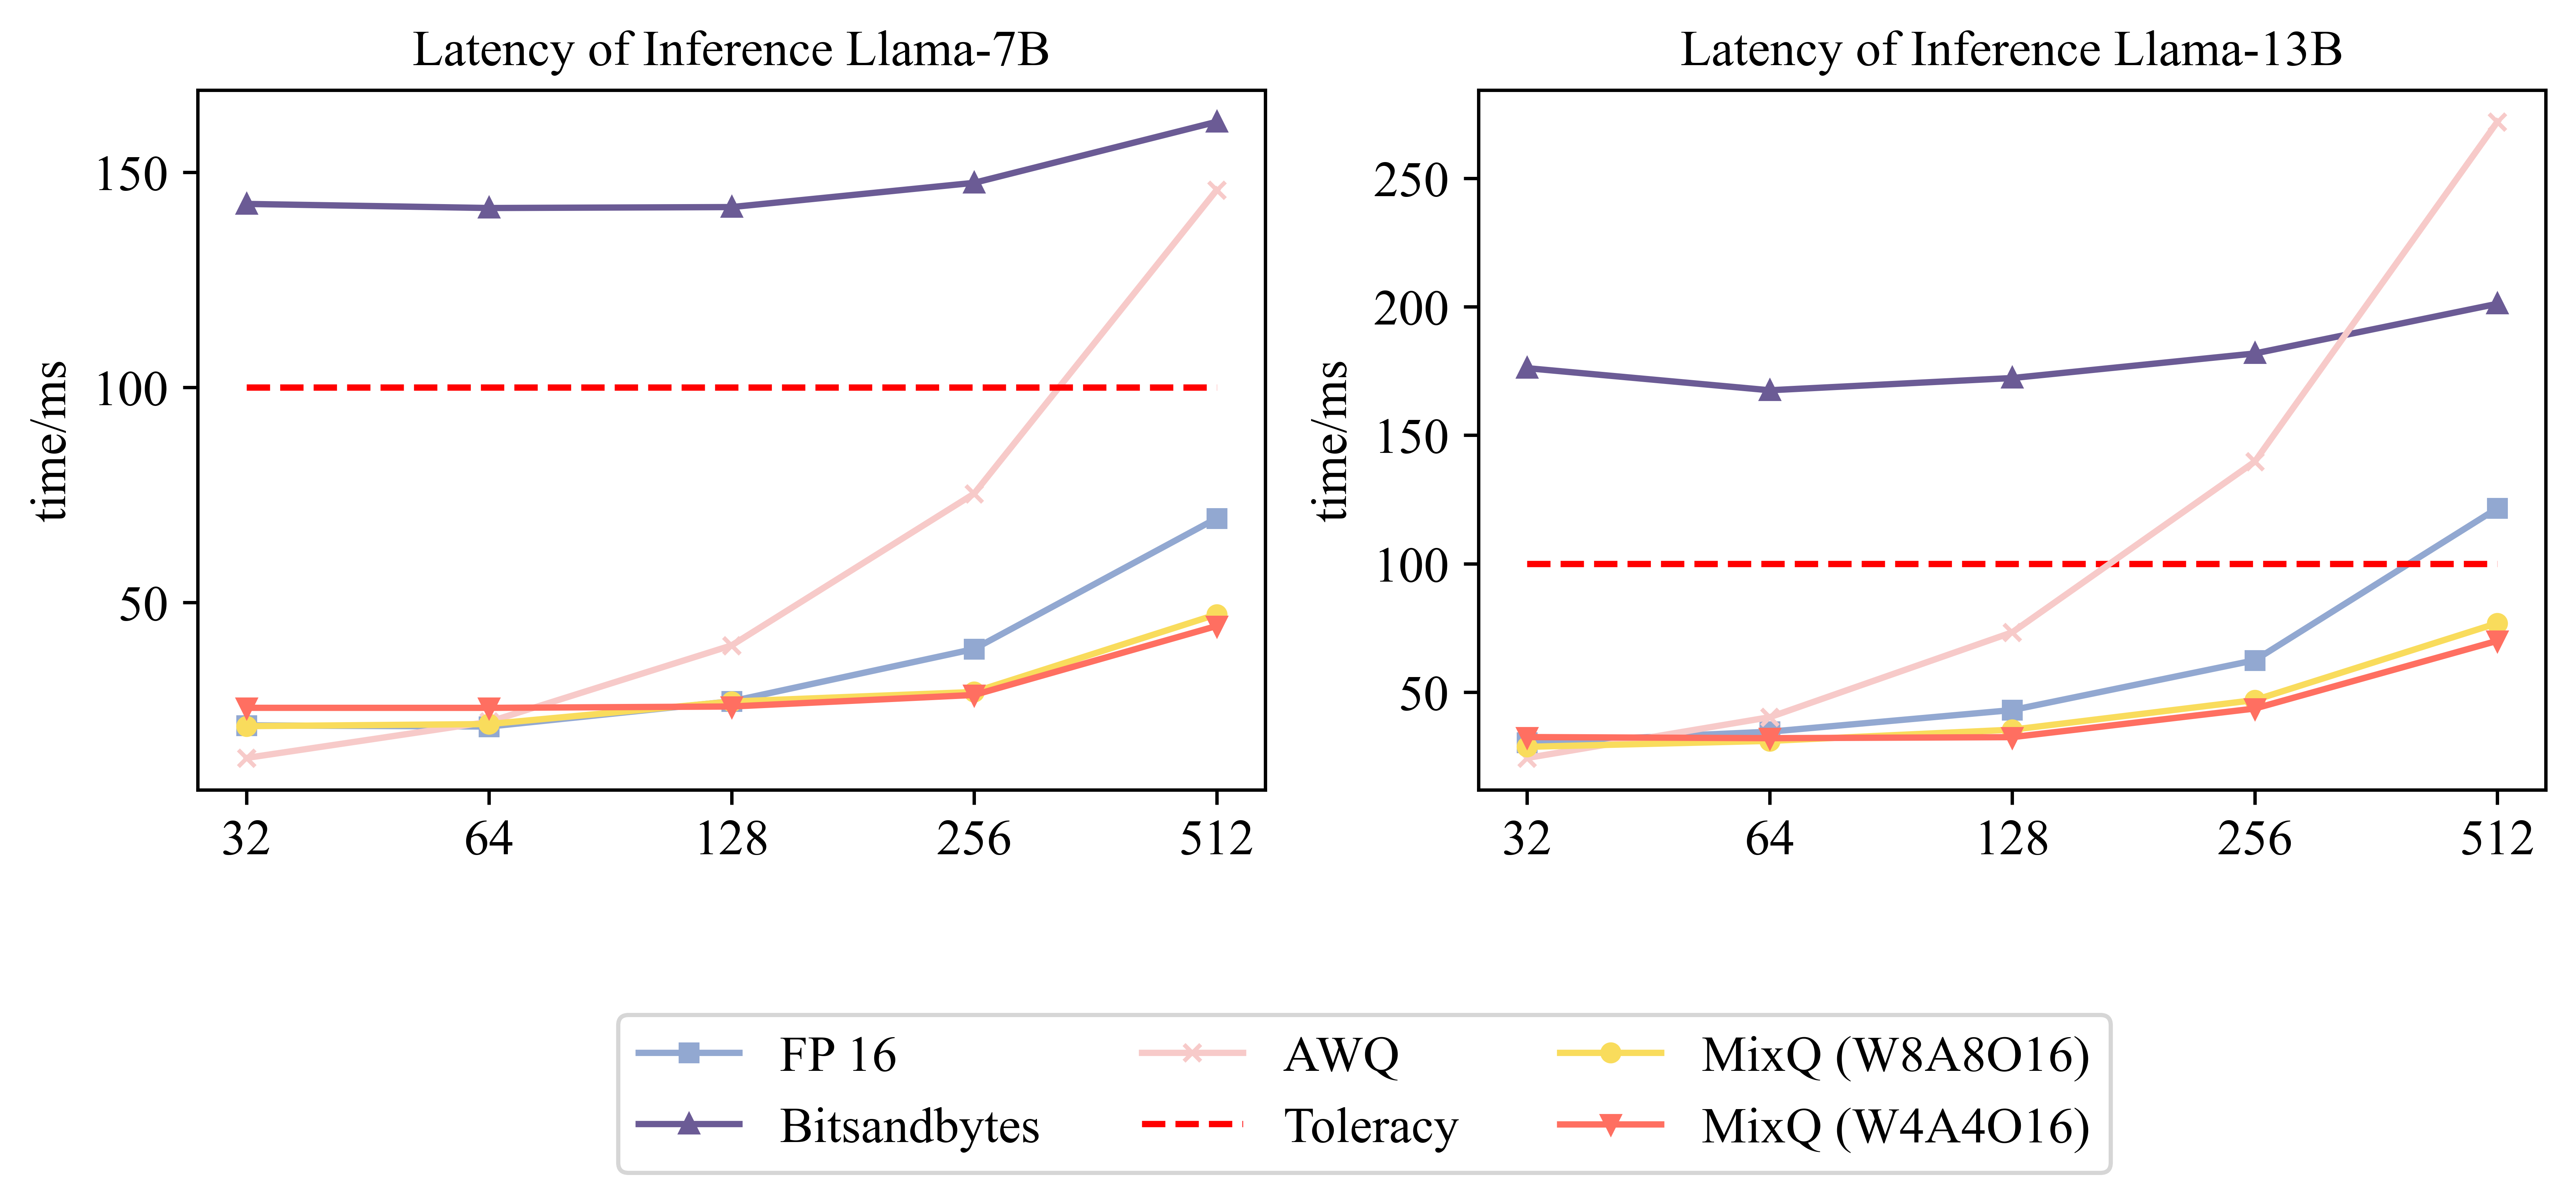

In [41]:
# latency
import matplotlib.pyplot as plt
import numpy as np

# Define the bar colors
bar_colors_default= ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#F9DC5C"]

# Set font size
plt.rcParams.update({'font.size': 12})

# Create a figure and set its size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), dpi=800)

# llama-7b
ai = ['32', '64', '128', '256', '512']
bnb = [142.65122264623642, 141.70000702142715, 141.91774278879166, 147.552952170372, 161.74716502428055]
fp16 = [21.390482783317566, 21.109476685523987, 26.986397802829742, 39.13969546556473, 69.53547894954681]
mixq8 = [21.204158663749695, 21.685630083084106, 26.923902332782745, 29.14535254240036, 47.19104617834091]
mixq4 = [25.466181337833405, 25.455959141254425, 25.772616267204285, 28.453469276428223, 44.490471482276917]
awq = [13.806268572807312, 22.203445434570312, 39.96925801038742, 75.26524364948273, 145.86584270000458]
tolerate = [100, 100, 100, 100, 100]
# bi = ['0','32', '64', '128', '256', '512','1024']

ax1.plot(ai, fp16, label='FP 16', marker='s', color=bar_colors_default[4], linewidth=1.5,markersize=4)
ax1.plot(ai, bnb, label='Bitsandbytes', marker='^', color=bar_colors_default[1], linewidth=1.5,markersize=4)
ax1.plot(ai, awq, label='AWQ', marker='x', color=bar_colors_default[3], linewidth=1.5,markersize=4)
ax1.plot(ai, tolerate, label='Toleracy', color='red', linewidth=1.5,markersize=4, linestyle='dashed')
ax1.plot(ai, mixq8, label='MixQ (W8A8O16)', marker='o', color=bar_colors_default[5], linewidth=1.5,markersize=4)
ax1.plot(ai, mixq4, label='MixQ (W4A4O16)', marker='v', color=bar_colors_default[0], linewidth=1.5,markersize=4)


# ax2: llama13b
bnb_13 = [176.095150411129, 167.4976497888565, 172.25614190101624, 181.8150132894516, 201.14820450544357]
fp16_13 = [30.41689097881317, 34.61074084043503, 43.0297926068306, 62.418319284915924, 121.56081944704056]
mixq4_13 = [32.52644091844559, 32.091282308101654, 32.49236196279526, 43.626464903354645, 69.97773796319962]
mixq8_13 = [28.723537921905518, 31.038537621498108, 35.39577126502991, 46.916693449020386, 76.8558606505394]
awq_13 = [24.39606934785843, 40.25109112262726, 73.28598946332932, 139.71683382987976, 271.97592705488205]

ax2.plot(ai, fp16_13, marker='s', color=bar_colors_default[4], linewidth=1.5,markersize=4)
ax2.plot(ai, bnb_13, marker='^', color=bar_colors_default[1], linewidth=1.5,markersize=4)
ax2.plot(ai, tolerate, color='red', linewidth=1.5,markersize=4, linestyle='dashed')
ax2.plot(ai, awq_13, marker='x', color=bar_colors_default[3], linewidth=1.5,markersize=4)
ax2.plot(ai, mixq8_13, marker='o', color=bar_colors_default[5], linewidth=1.5,markersize=4)
ax2.plot(ai, mixq4_13, marker='v', color=bar_colors_default[0], linewidth=1.5,markersize=4)



# Set the x-axis and y-axis labels for ax1
# ax1.set_xlabel('Batch Size',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
ax1.set_ylabel('time/ms',fontsize=12,fontdict={'family' : 'Times New Roman', 'size' : 16})
ax1.set_title('Latency of Inference Llama-7B',fontsize=12, fontname='Times New Roman')

# Set the x-axis and y-axis labels for ax2
# ax2.set_xlabel('Batch Size',fontsize=12, fontproperties = 'Times New Roman')
ax2.set_ylabel('time/ms',fontsize=12, fontproperties = 'Times New Roman')

# Set the title of ax2
ax2.set_title('Latency of Inference Llama-13B',fontsize=12, fontname='Times New Roman')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

x1_label = ax1.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax1.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
 
x1_label = ax2.get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = ax2.get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]

legend_font = {
    'family': 'Times New Roman', # 字体
    'style': 'normal',
    'size': 12, # 字号
    'weight': "normal", # 是否加粗，不加粗
}
# Add a legend to ax1

fig.legend(fontsize='small', bbox_to_anchor=(0.51, -0.11), loc='upper center', ncol=3, prop=legend_font)
plt.savefig('figure/latency.pdf', dpi=800, bbox_inches='tight')

# Show the plot
plt.show()
plt.close()